<a href="https://colab.research.google.com/github/sboonpan/Project_Feature_Engineering/blob/main/Fractional_Diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Feature Engineering**

### **Fractional Differentiation**

**Definition:** A fractionally differenced time series (as opposed to integer differencing) retains the memory of the original series (as indicated by the high correlation), but also it is stationary, the mean and variance of those time series should be time-invariant (or not change with time). (e.g. have the same variance, mean, skew, etc).

Lopez de Prado proposes an alternative method, named fractional differentiation, that aims to find the optimal balance between zero differentiation and fully differentiated. The goal of the fractional differentiation is to find the fraction d, which is the minimum number necessary to achieve stationarity, while keeps the maximum amount of memory in our data.

**Cosider the backshift operator** 

$$ 
B^{k}X_{t} = X_{t-n}
$$

for any integer $ k\geq 0 $

For example, $(1-B^{2}) = 1-2B+B^{2}$, where $B^{2}X_{t} = X_{t-2}$

so that 

$$
(1-B^{2})X_{t} = X_{t}-2X_{t-1}+X_{t-2} ,
$$

here, we have the binormial series,  $(1+x)^{d} = \sum_{k=o}^{n} \begin{pmatrix} d \\ k \end{pmatrix}(-B)^{k}$
$$ 
\begin{array}{rcl}(1-B)^{d} & = & \sum_{k=o}^{n} \begin{pmatrix} d \\ k \end{pmatrix}x^{k} \\
& = & \sum_{k=o}^{n}\prod_{i=0}^{k-1}\frac{(d-i)}{k!}(-B)^{k} 
\end{array}
$$
so that
$$
(1-B)^{d}  =  1-dB+\frac{d(d-1)}{2!}B^{2}-\frac{d(d-1)(d-2)}{3!}B^{3}+...
$$

### **Fractional calculus can preserve long memory**

Define arithmetic series 
$$ 
X_{t} = \sum_{k=0}^{n}\omega_{k}X_{t-k}
$$
with weights $\omega$
$$
\omega = \left\{1, -d, \frac{d(d-1)}{2!}, \frac{d(d-1)(d-2)}{3!}, ... , (-1)^{k}\prod_{i=0}^{k-1}\frac{d-i}{k!}, ... \right\}
$$
and values $X$

$$
X = \left\{X_{t}, X_{t-1}, X_{t-2}, X_{t-3}, ..., X_{t-k}, ...\right\}
$$


### **Physical Meaning** 

For $d$ is a positive number, 

$$
\prod_{i=0}^{k-1}\frac{d-i}{k!} = 0, \forall k > d 
$$

The memory beyond that this point cancelled. For example

if $d = 1$ ,
$$
\prod_{i=0}^{k-1}\frac{d-i}{k!} = 0, \forall k > 1 
$$

then 
$$
\omega_{1} = \left\{1, -1, 0, 0, 0, 0,  ...\right\} ,
$$
if $ d =2 $,

$$
\omega_{2} = \left\{1, -2, 1, 0, 0, 0,  ...\right\} ,
$$

### **Recerative Estimation**

For $ k = 0, ... , $ we get $\omega_{0} = 1$, and generated iteratively


$$ 
\omega _{k} = -\omega _{k-1} \frac{d-k+1}{k}
$$


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 300

In [ ]:
start = '2000'
end   = '2020'

symbol = "AAPL"
df = pd.read_csv(f"DJW/{symbol}.csv", index_col=0)
df.set_index(pd.to_datetime(df.index), inplace=True)
df = df[start:end]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.858137,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.785788,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.797286,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.728291,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.762789,460734400
...,...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,130.347565,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,131.352829,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,136.050766,124486200


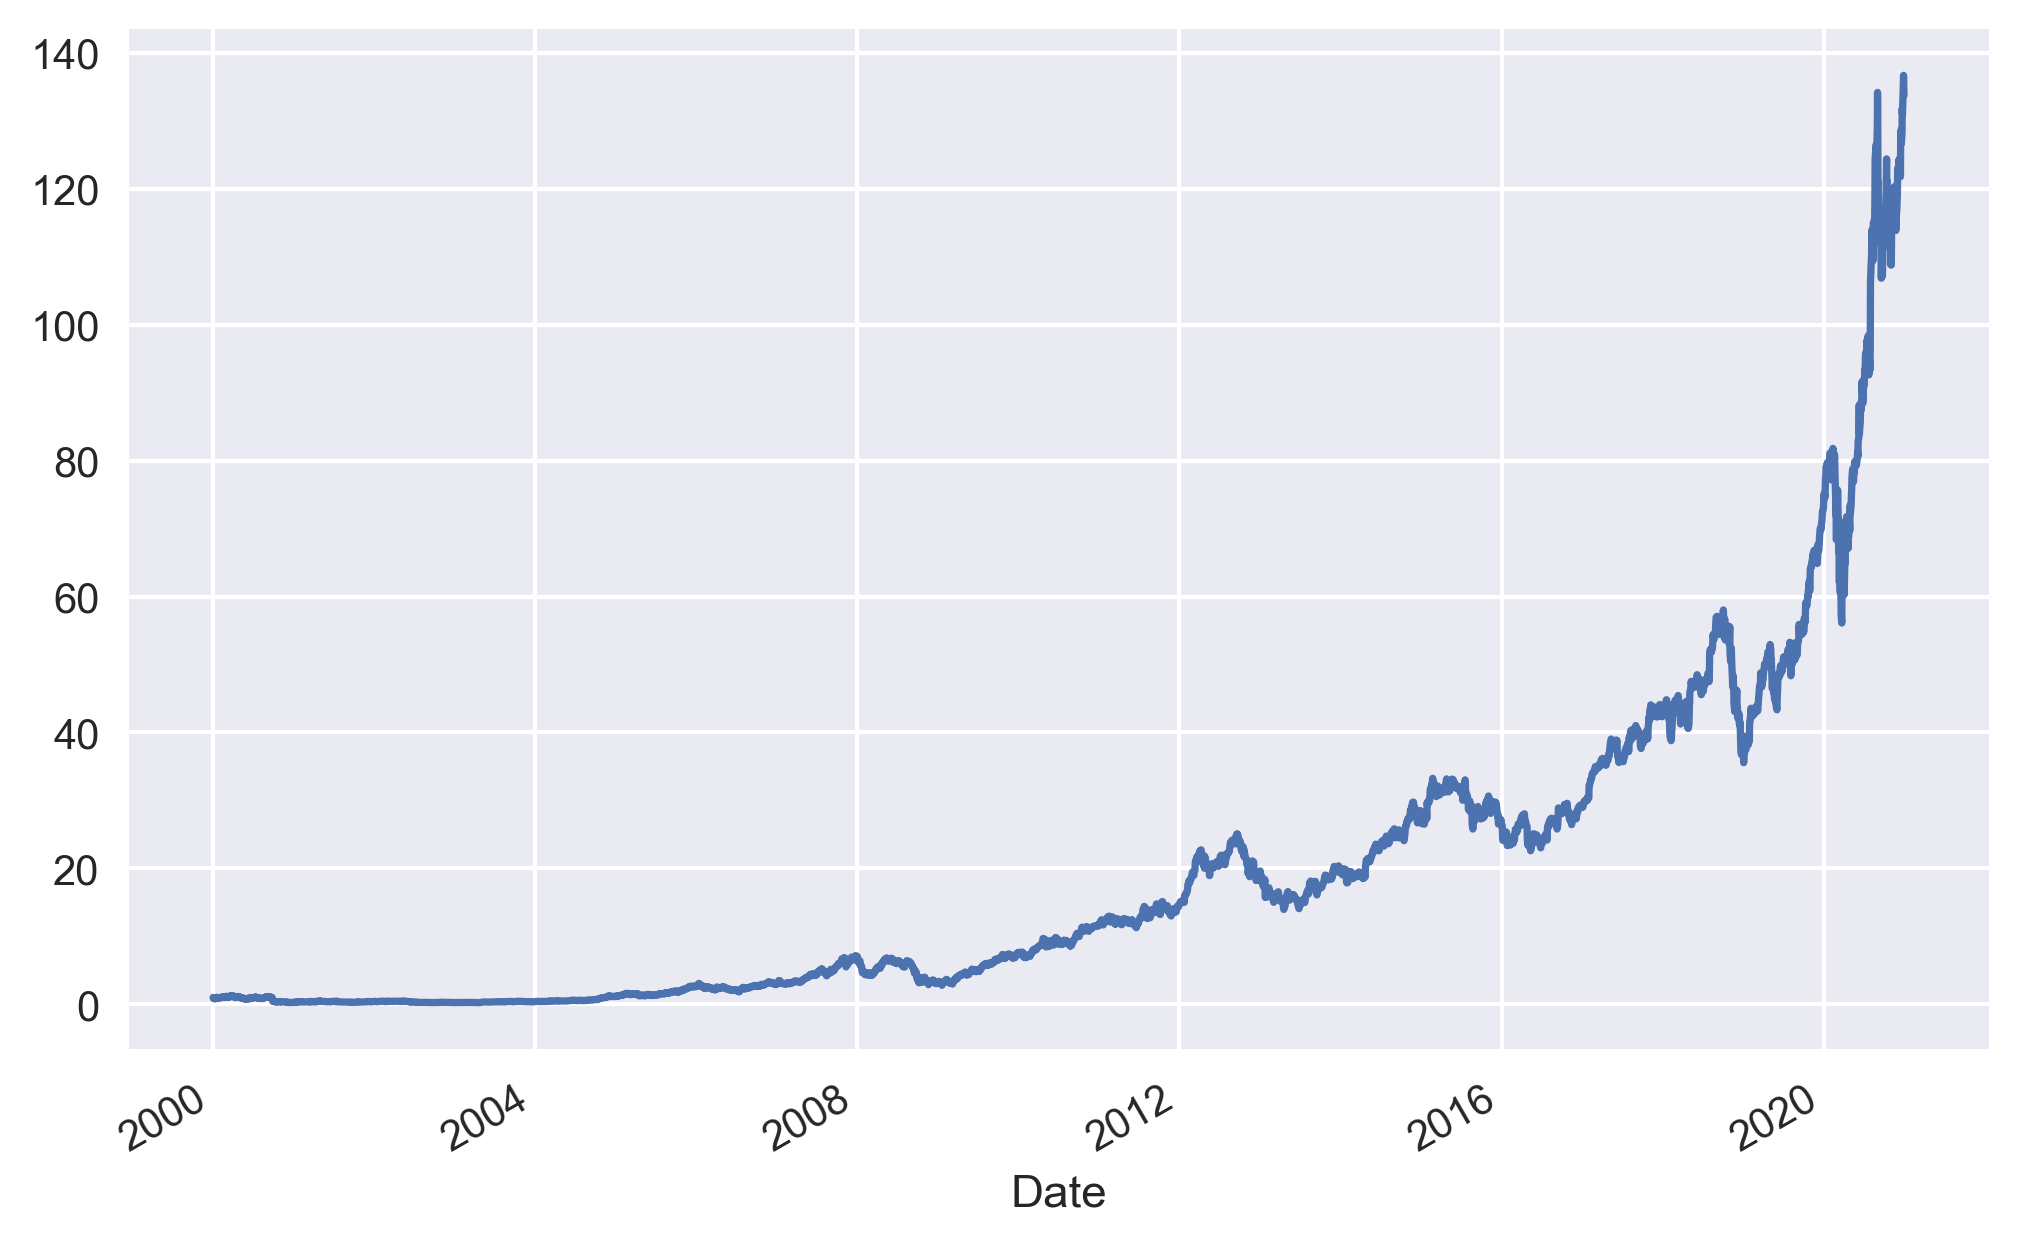

In [ ]:
df['Close'].plot();

In [ ]:
data = df.copy()
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.858137,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.785788,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.797286,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.728291,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.762789,460734400
...,...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,130.347565,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,131.352829,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,136.050766,124486200


In [ ]:
data['Returns'] = np.log(data['Close']/data['Close'].shift(1))
data = data.dropna()
data

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.785788,512377600,-0.088077
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.797286,778321600,0.014527
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.728291,767972800,-0.090514
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.762789,460734400,0.046281
2000-01-10,0.910714,0.912946,0.845982,0.872768,0.749373,505064000,-0.017744
...,...,...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,130.347565,88223700,-0.007000
2020-12-24,131.320007,133.460007,131.100006,131.970001,131.352829,54930100,0.007683
2020-12-28,133.990005,137.339996,133.509995,136.690002,136.050766,124486200,0.035141


<AxesSubplot:xlabel='Date'>

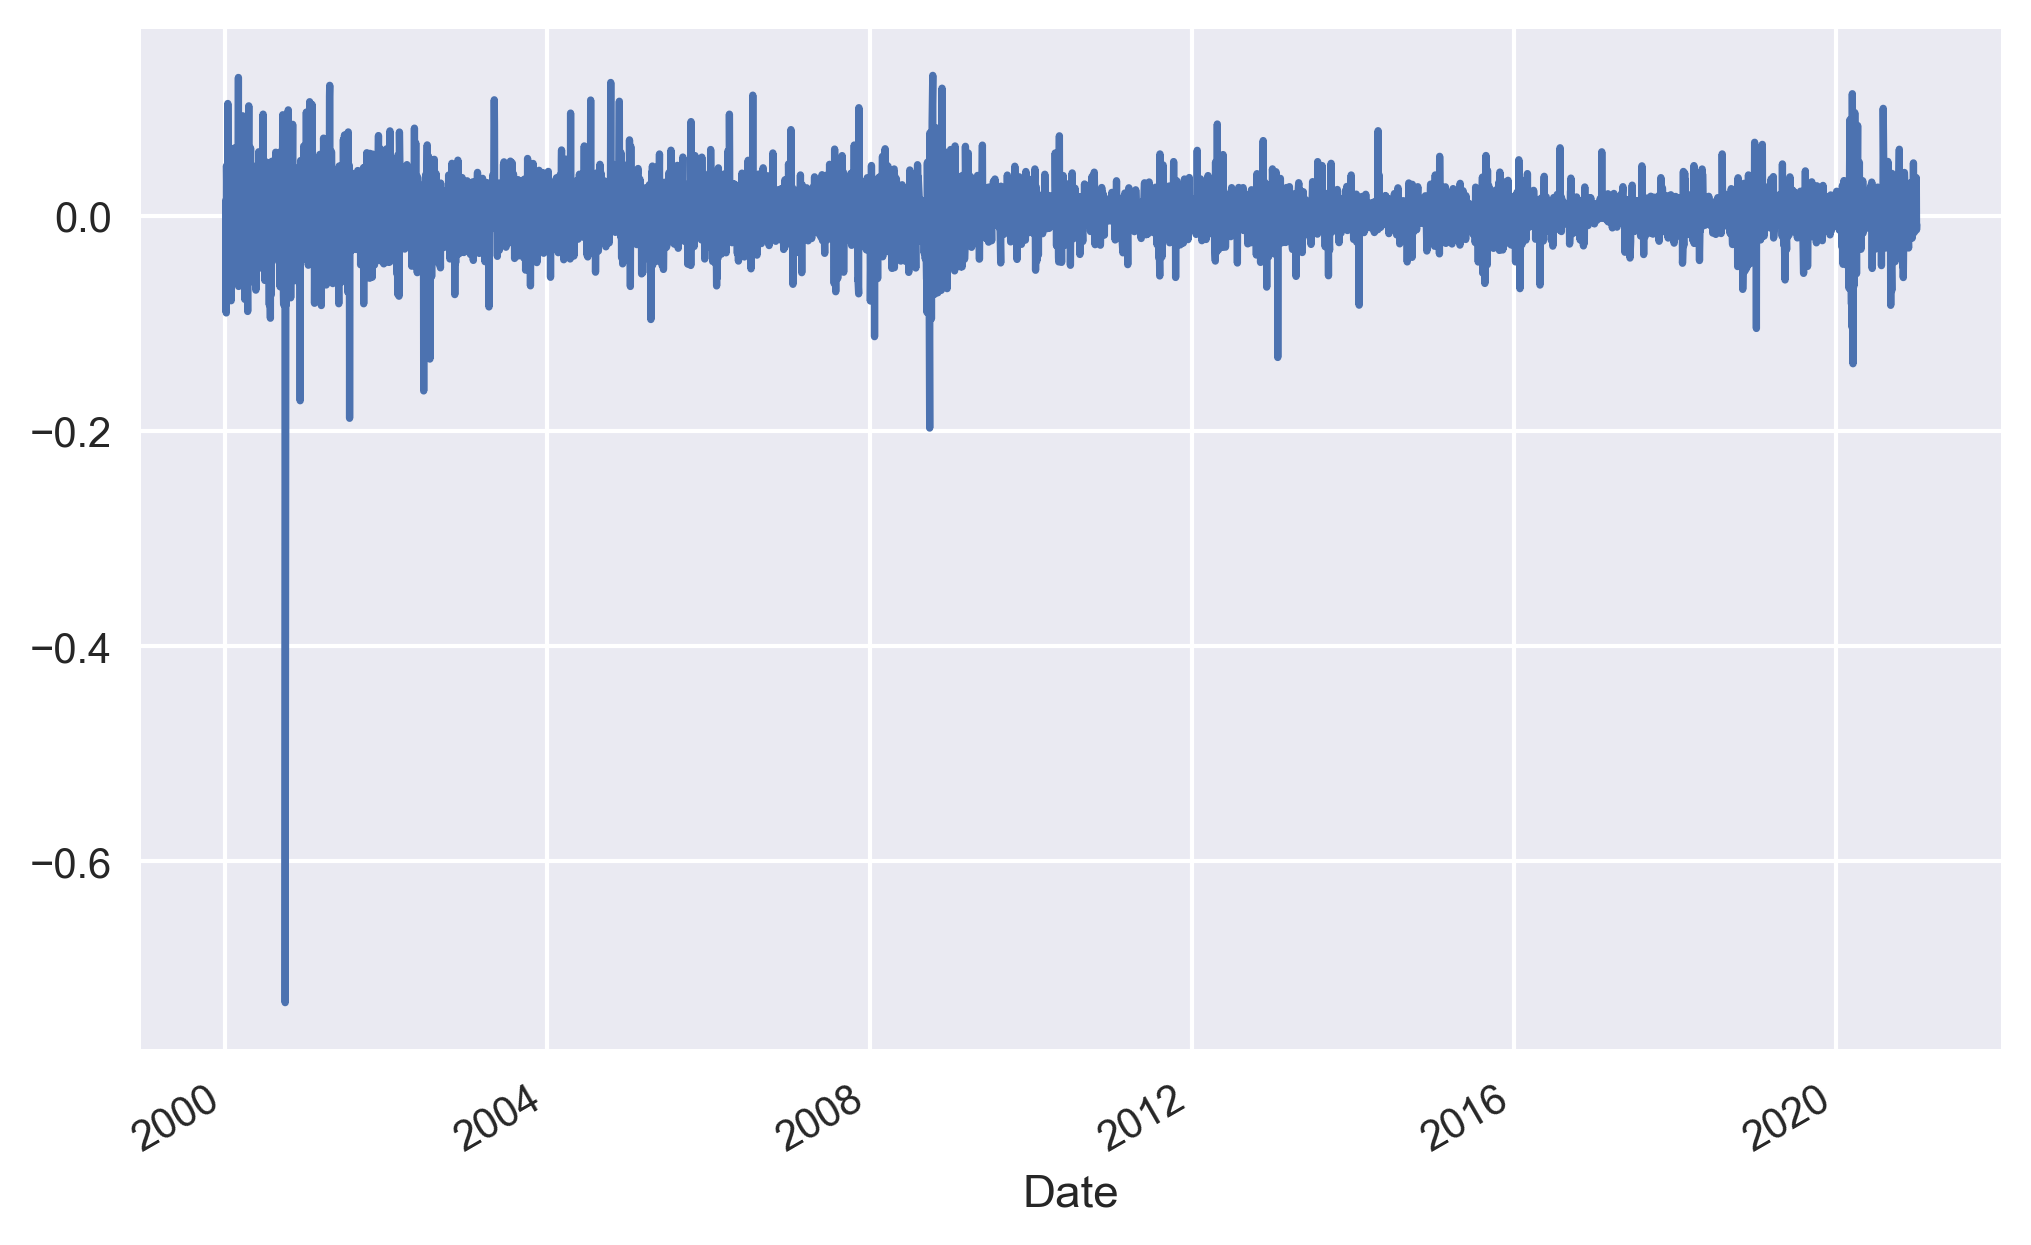

In [ ]:
data['Returns'].plot()

In [ ]:
price = df['Close']
price.head()

Date
2000-01-03    0.999442
2000-01-04    0.915179
2000-01-05    0.928571
2000-01-06    0.848214
2000-01-07    0.888393
Name: Close, dtype: float64

### **Coding**
**Reccurent relations**
$$ 
\omega _{k} = -\omega _{k-1} \frac{d-k+1}{k}
$$

In [ ]:
def getWeights(d,size):
    '''
    d:fraction
    k:the number of samples
    w:weight assigned to each samples
    
    '''
    # thres>0 drops insignificant weights
    w=[1.]
    for k in range(1,size):
        w_ = -w[-1]/k*(d-k+1)
        w.append(w_)
    w=np.array(w[::-1]).reshape(-1,1) #sort and reshape the w
    return w

In [ ]:
w = getWeights(0.1, price.shape[0])
#w

In [ ]:
def weight_by_d(dRange=[0,1], nPlots=11, size=6):
    '''
    dRange: the range of d
    nPlots: the number of d we want to check
    size: the data points used as an example
    w: collection of w by different d value
    '''
    
    w=pd.DataFrame()
    
    for d in np.linspace(dRange[0],dRange[1],nPlots):
        w_=getWeights(d,size=size)
        w_=pd.DataFrame(w_,index=range(w_.shape[0])\
        [::-1],columns=[d])
        w=w.join(w_,how='outer')
        
    return w

In [ ]:
weight_by_d_0_1 = weight_by_d([0,1]) ;
weight_by_d_1_2 = weight_by_d([1,2]) ;
weight_by_d_2_3 = weight_by_d([2,3]) ;
weight_by_d_3_4 = weight_by_d([3,4] ,  size = 8) ;
weight_by_d_0_10 = weight_by_d([0,10], size=12) ;
weight_by_d_2_0 = weight_by_d([-2,0]) ;

In [ ]:
def plotWeights(w, v=2):
    plt.rcParams['figure.figsize'] = [8, 5]    
    ax=w.plot()
    ax.axvline(x=v, c='c', linestyle='-.', lw=2.5, alpha=0.4)
    ax.axhline(y=0, c='c', linestyle='-.', lw=2.5, alpha=0.4)
    ax.legend(loc='upper right') ;
    ax.set_ylabel('Weight')
    ax.set_xlabel('Number of data points')


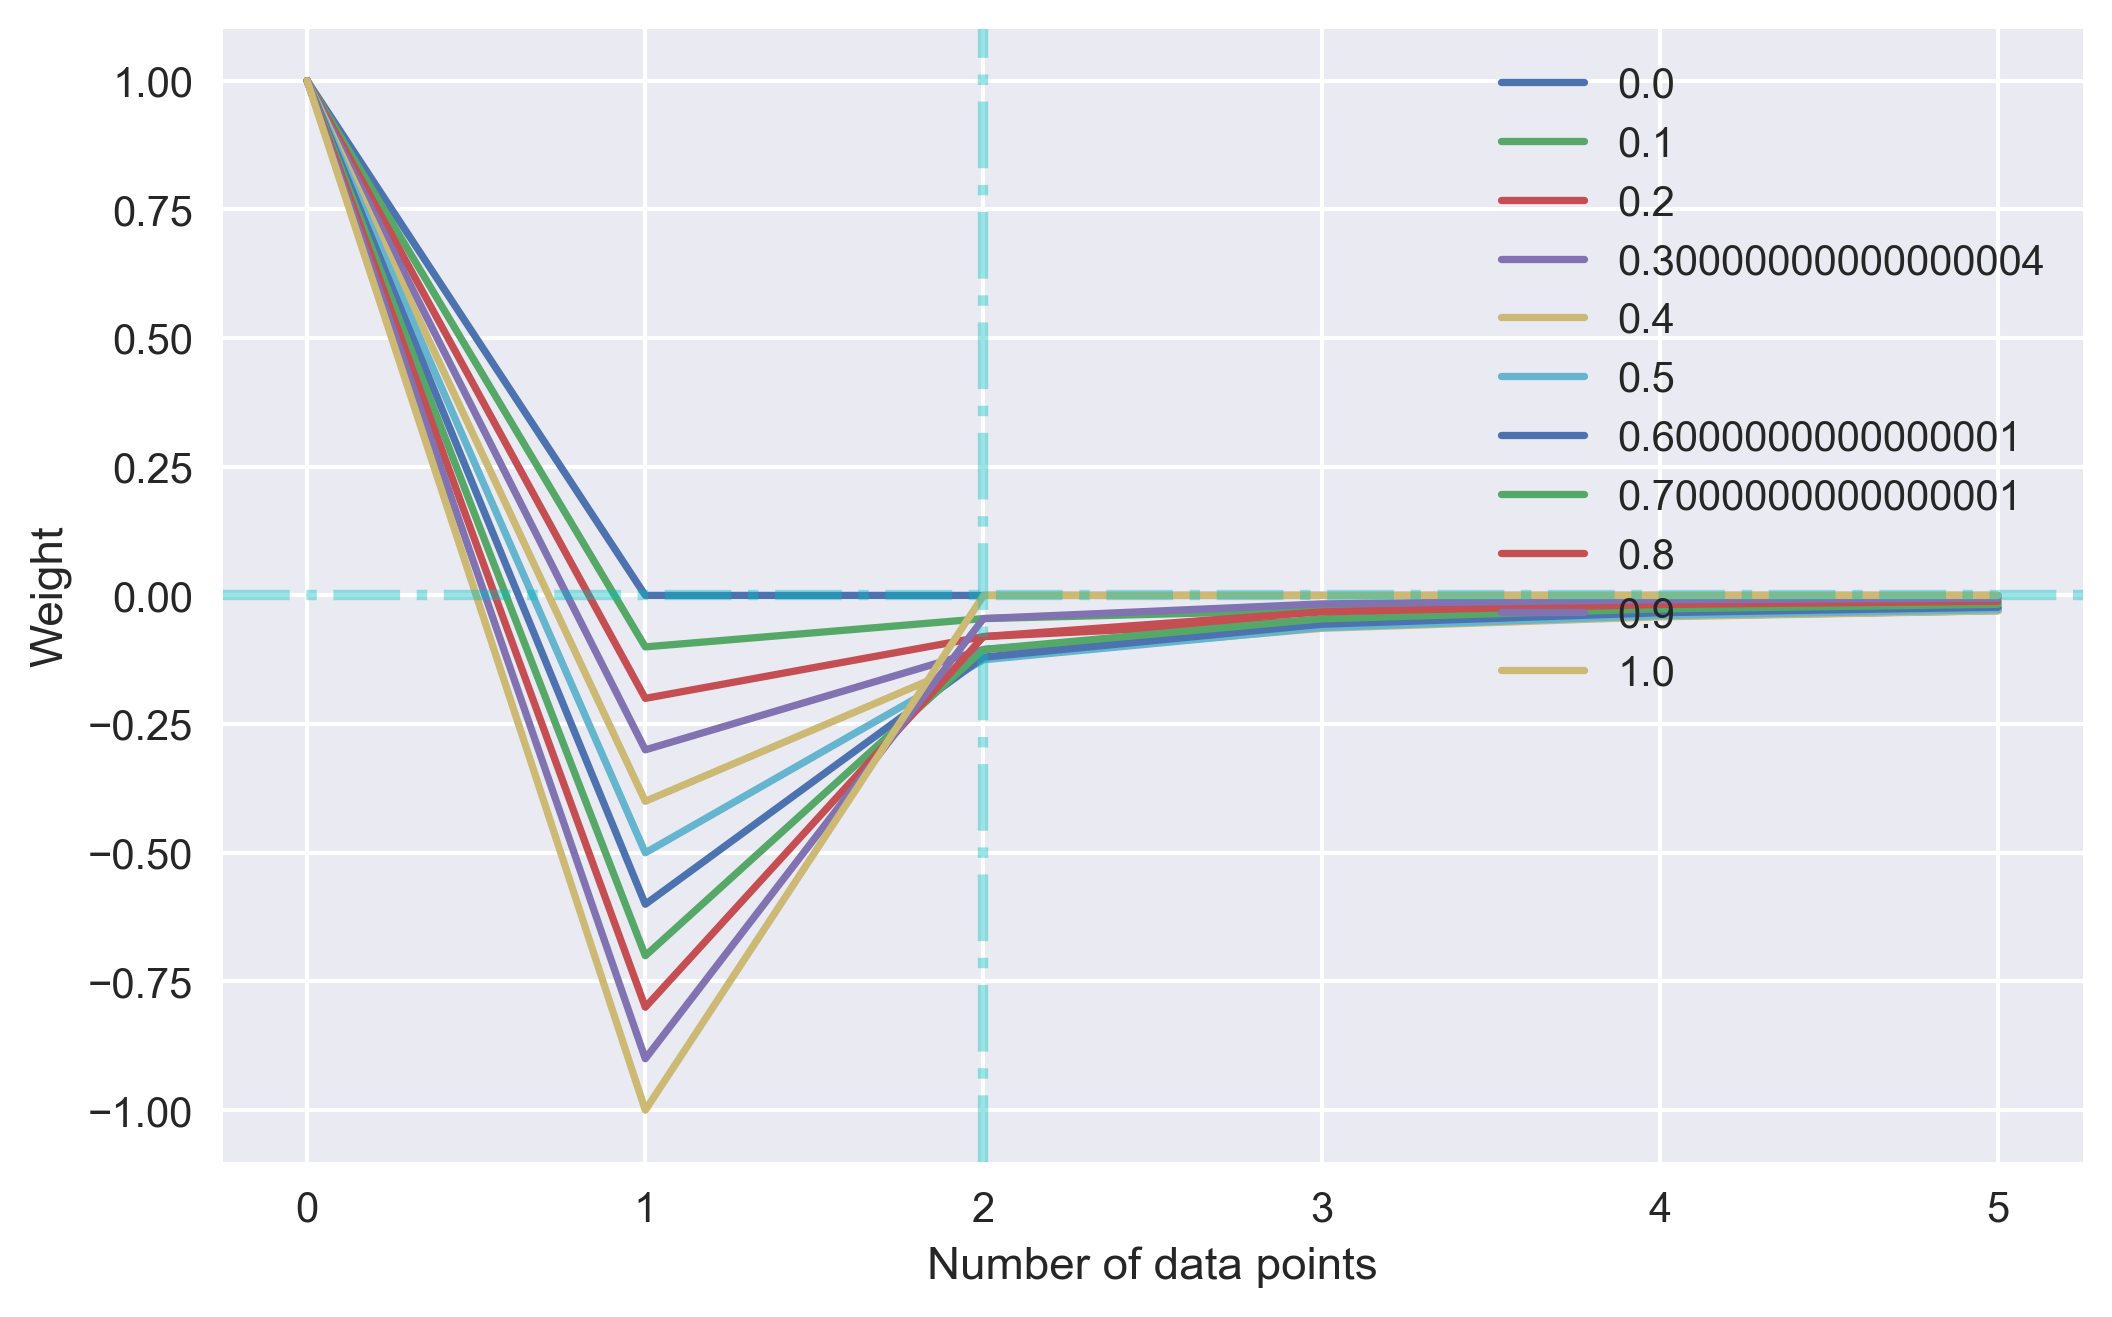

In [ ]:
plotWeights(weight_by_d_0_1) ;

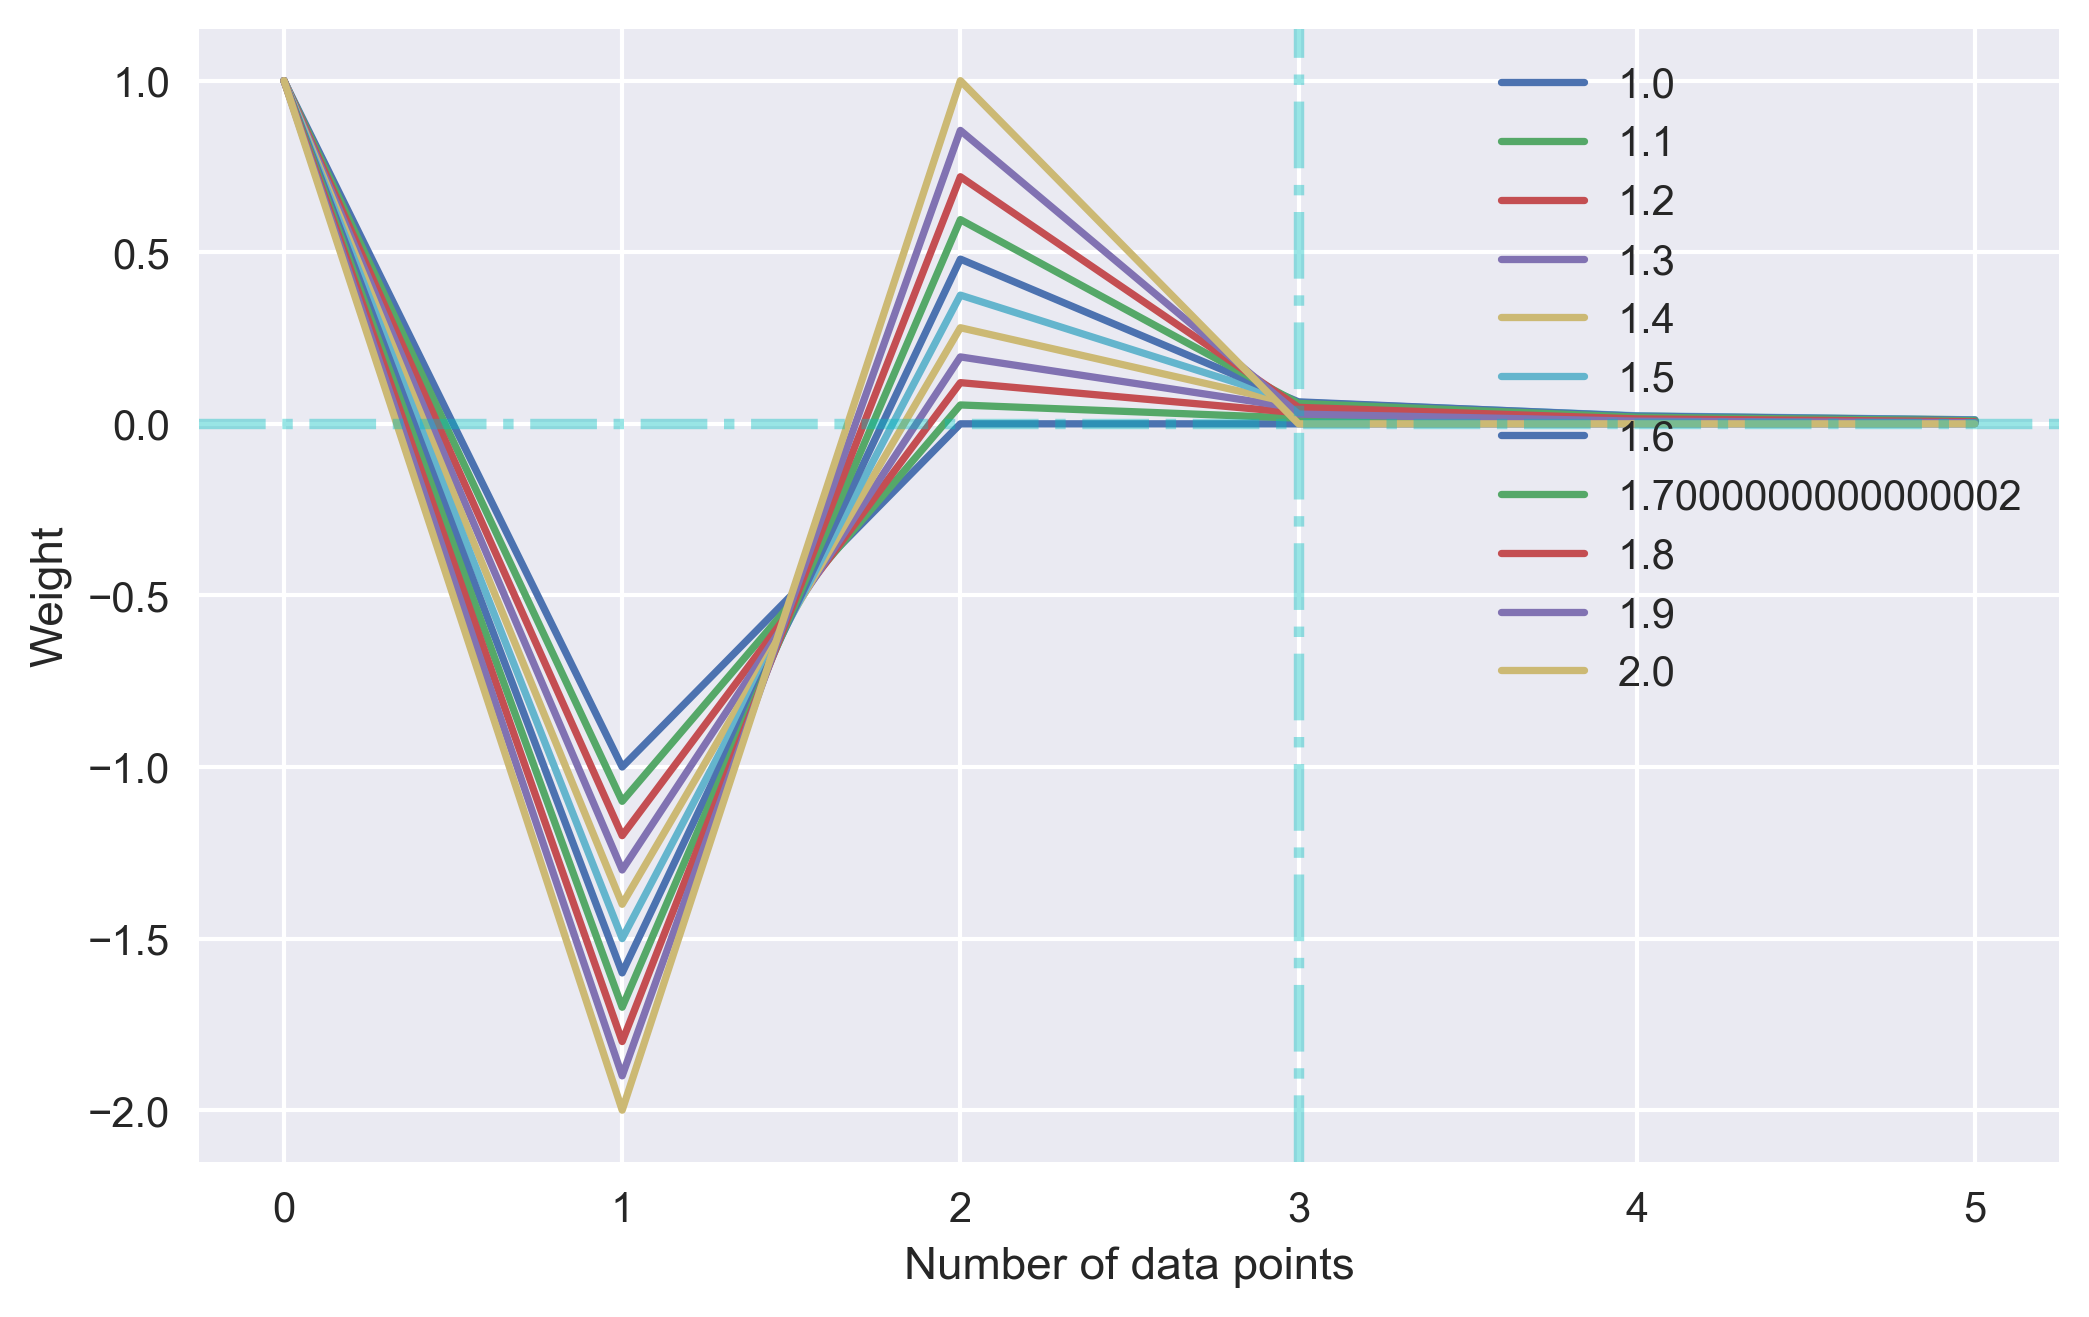

In [ ]:
plotWeights(weight_by_d_1_2, v=3);

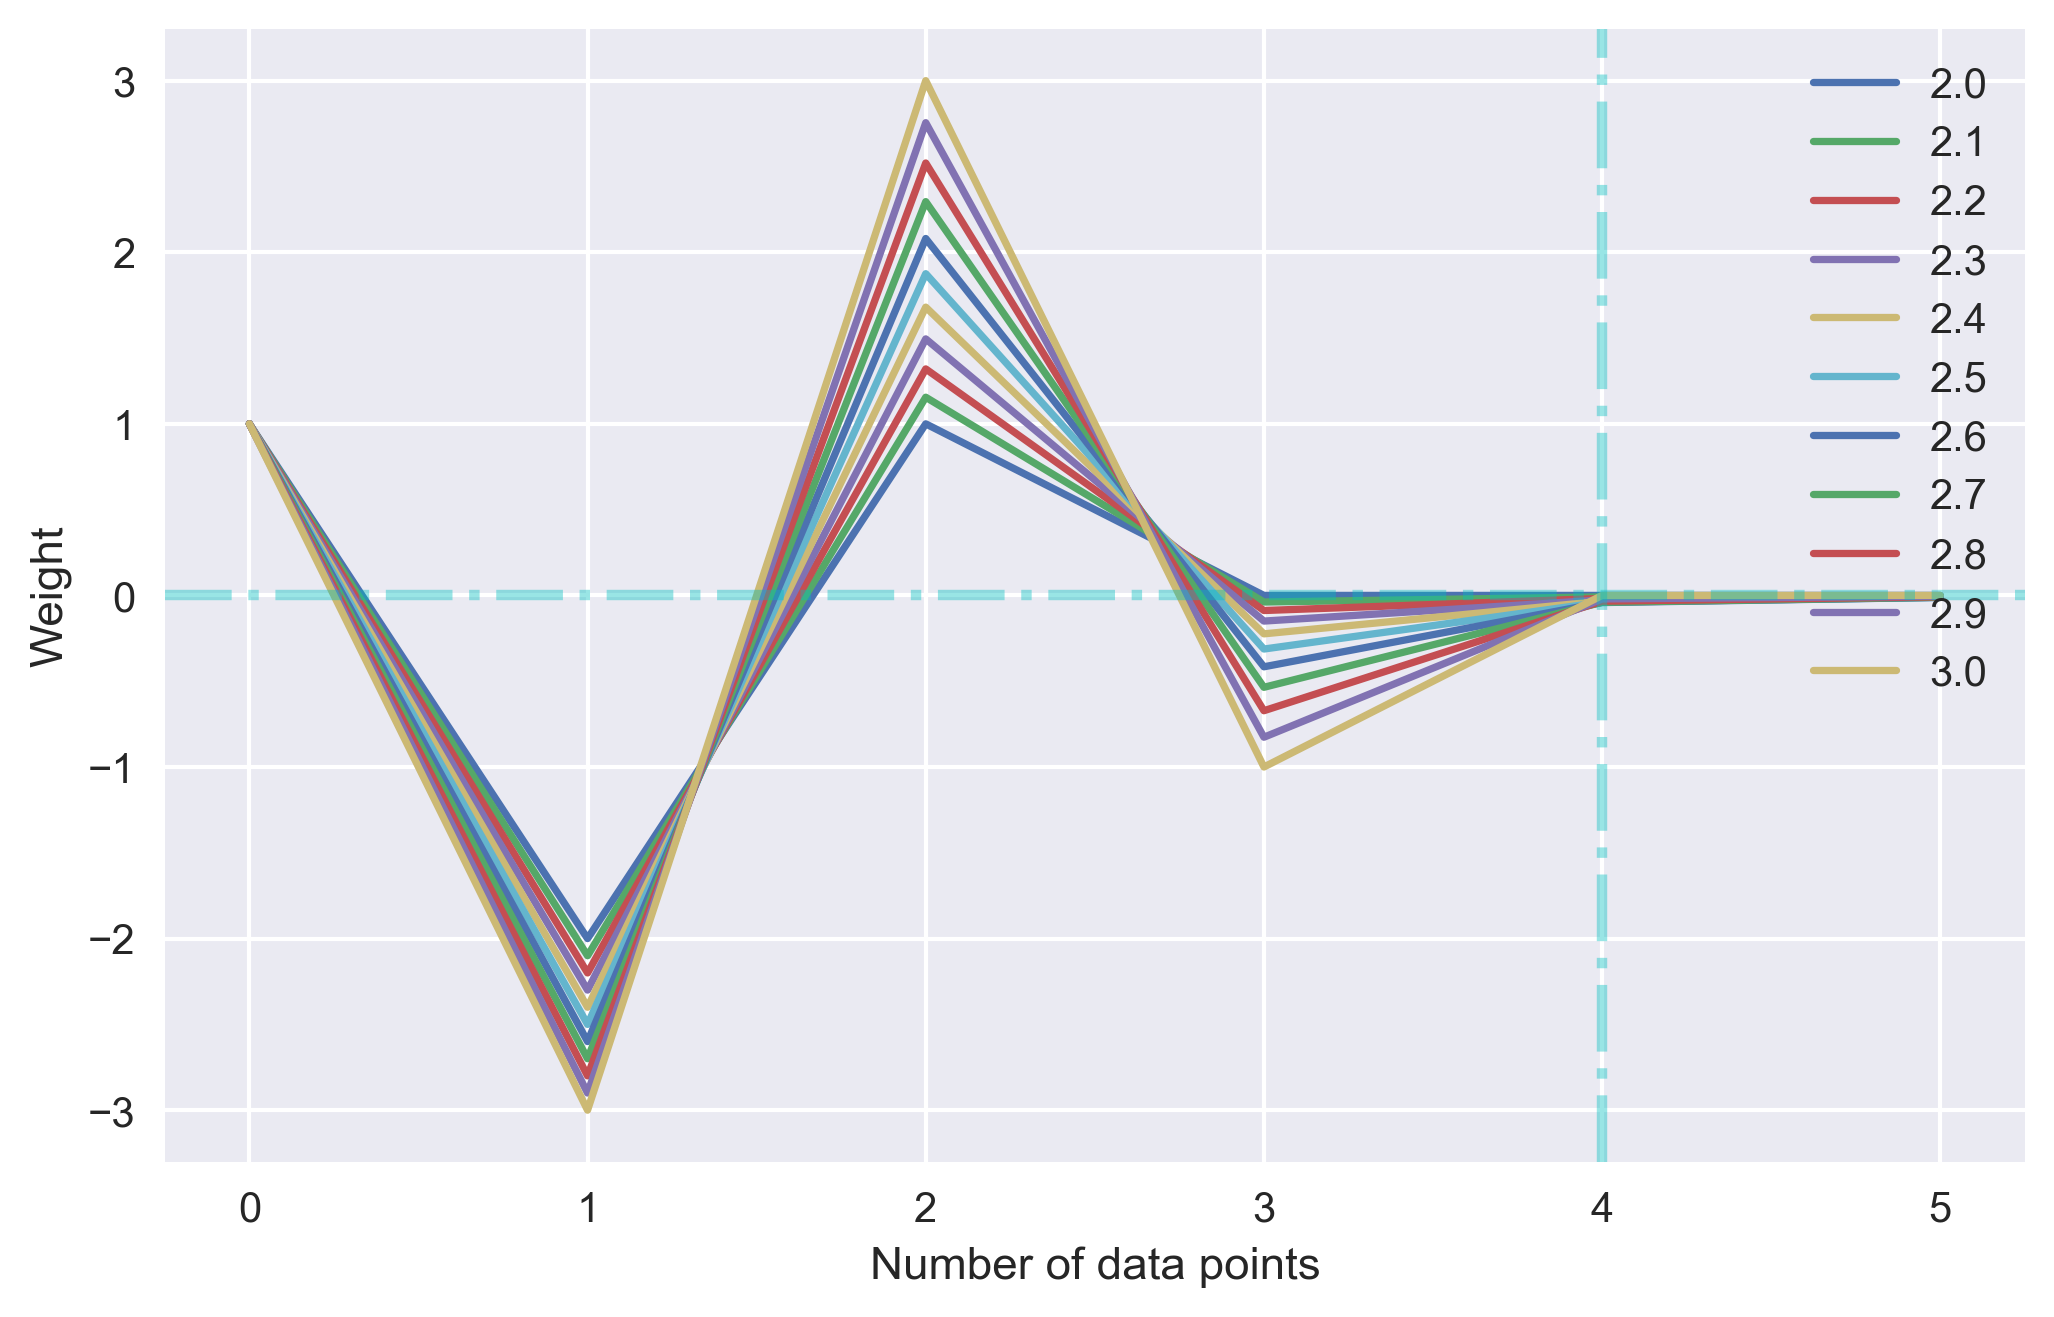

In [ ]:
plotWeights(weight_by_d_2_3, v =4);

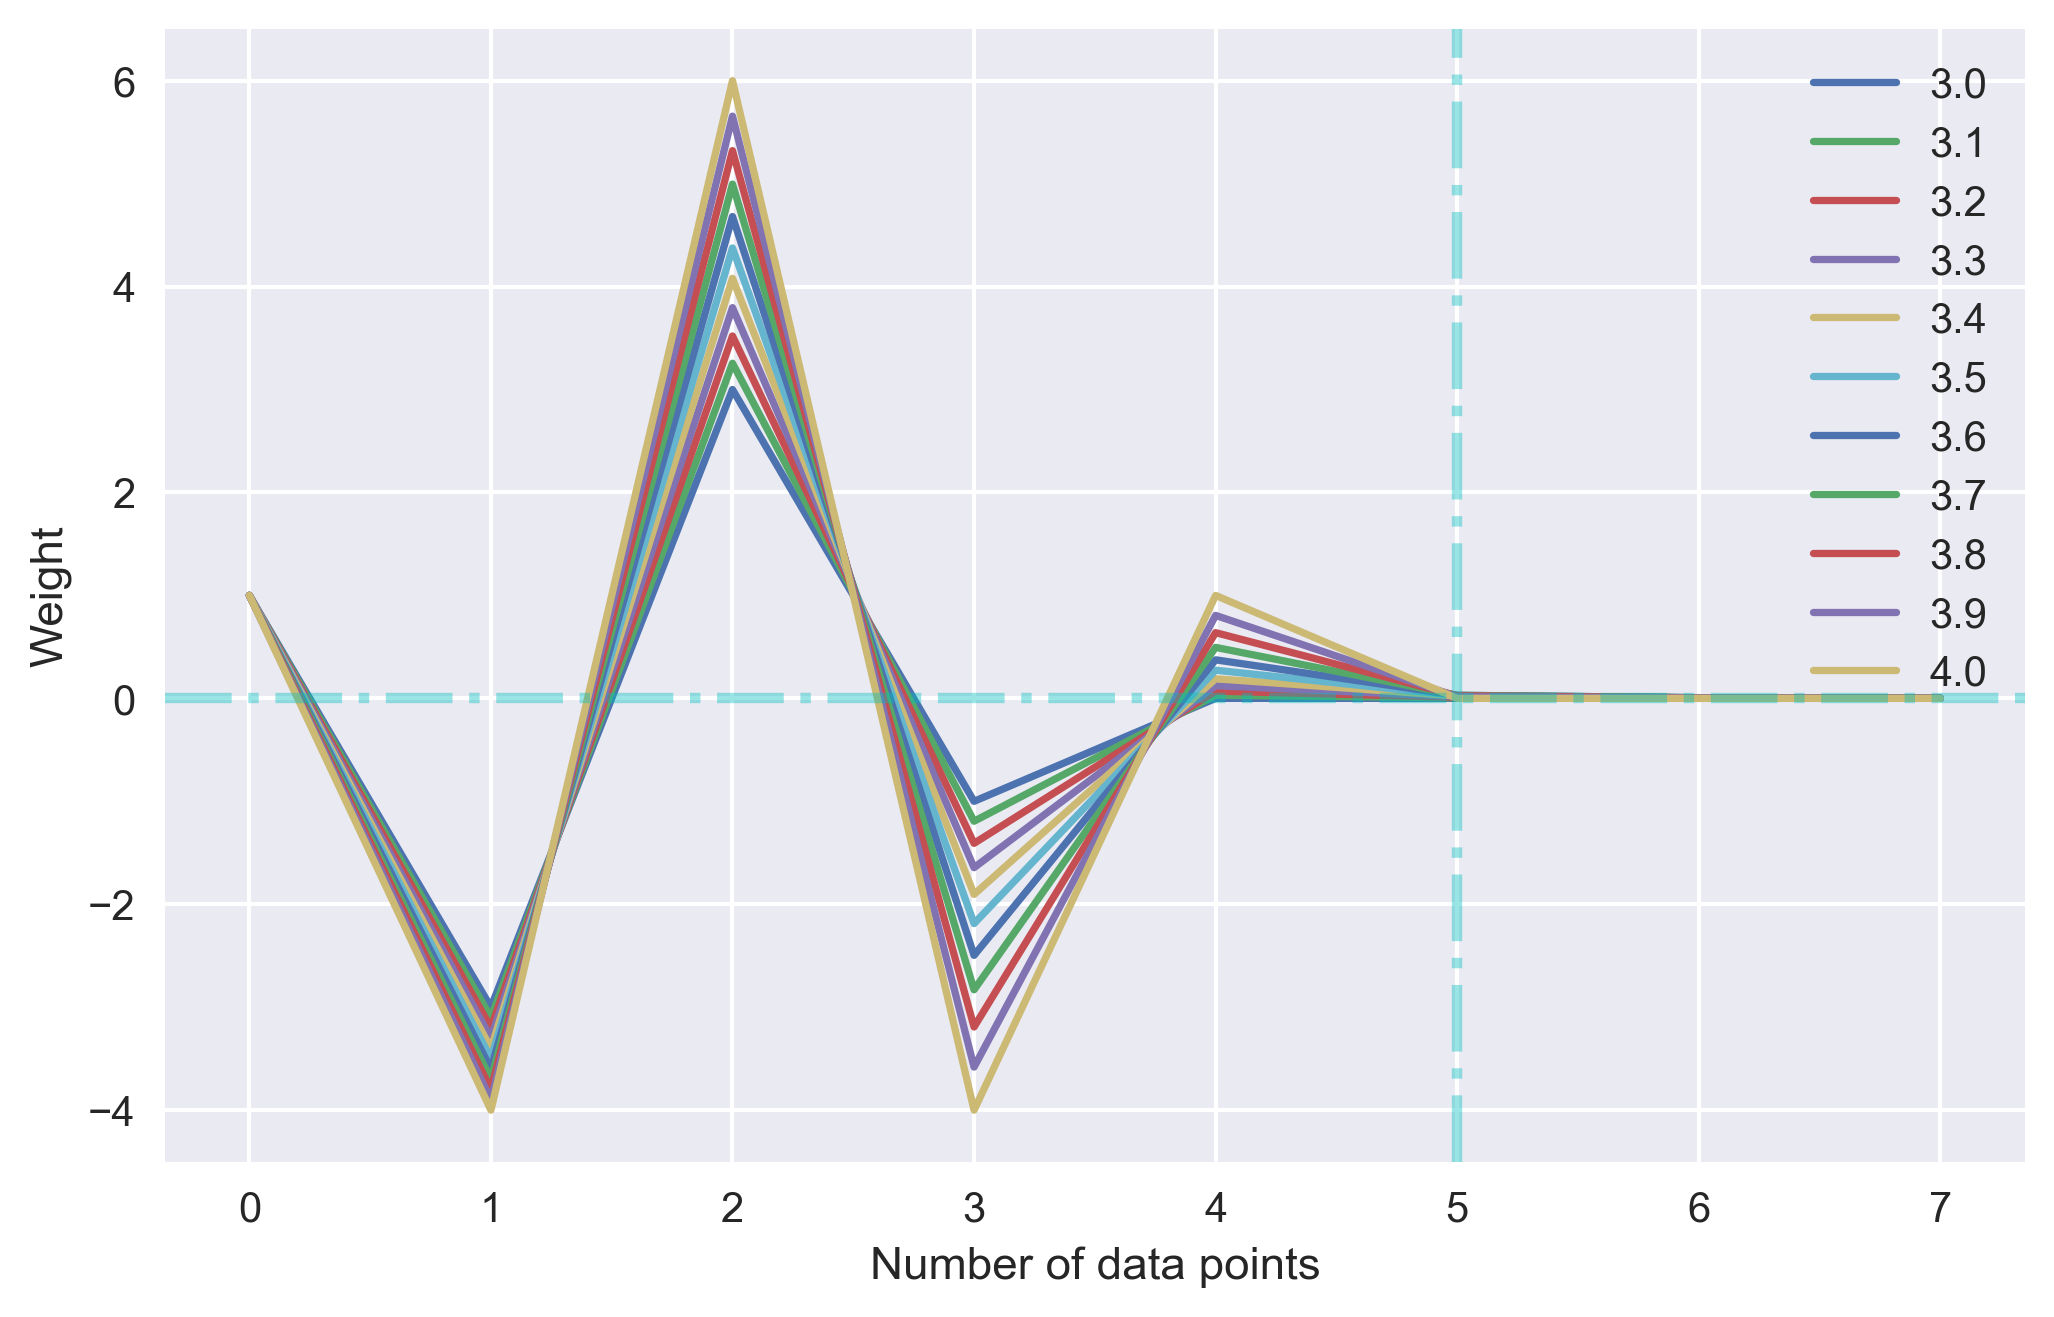

In [ ]:
plotWeights(weight_by_d_3_4, v =5);

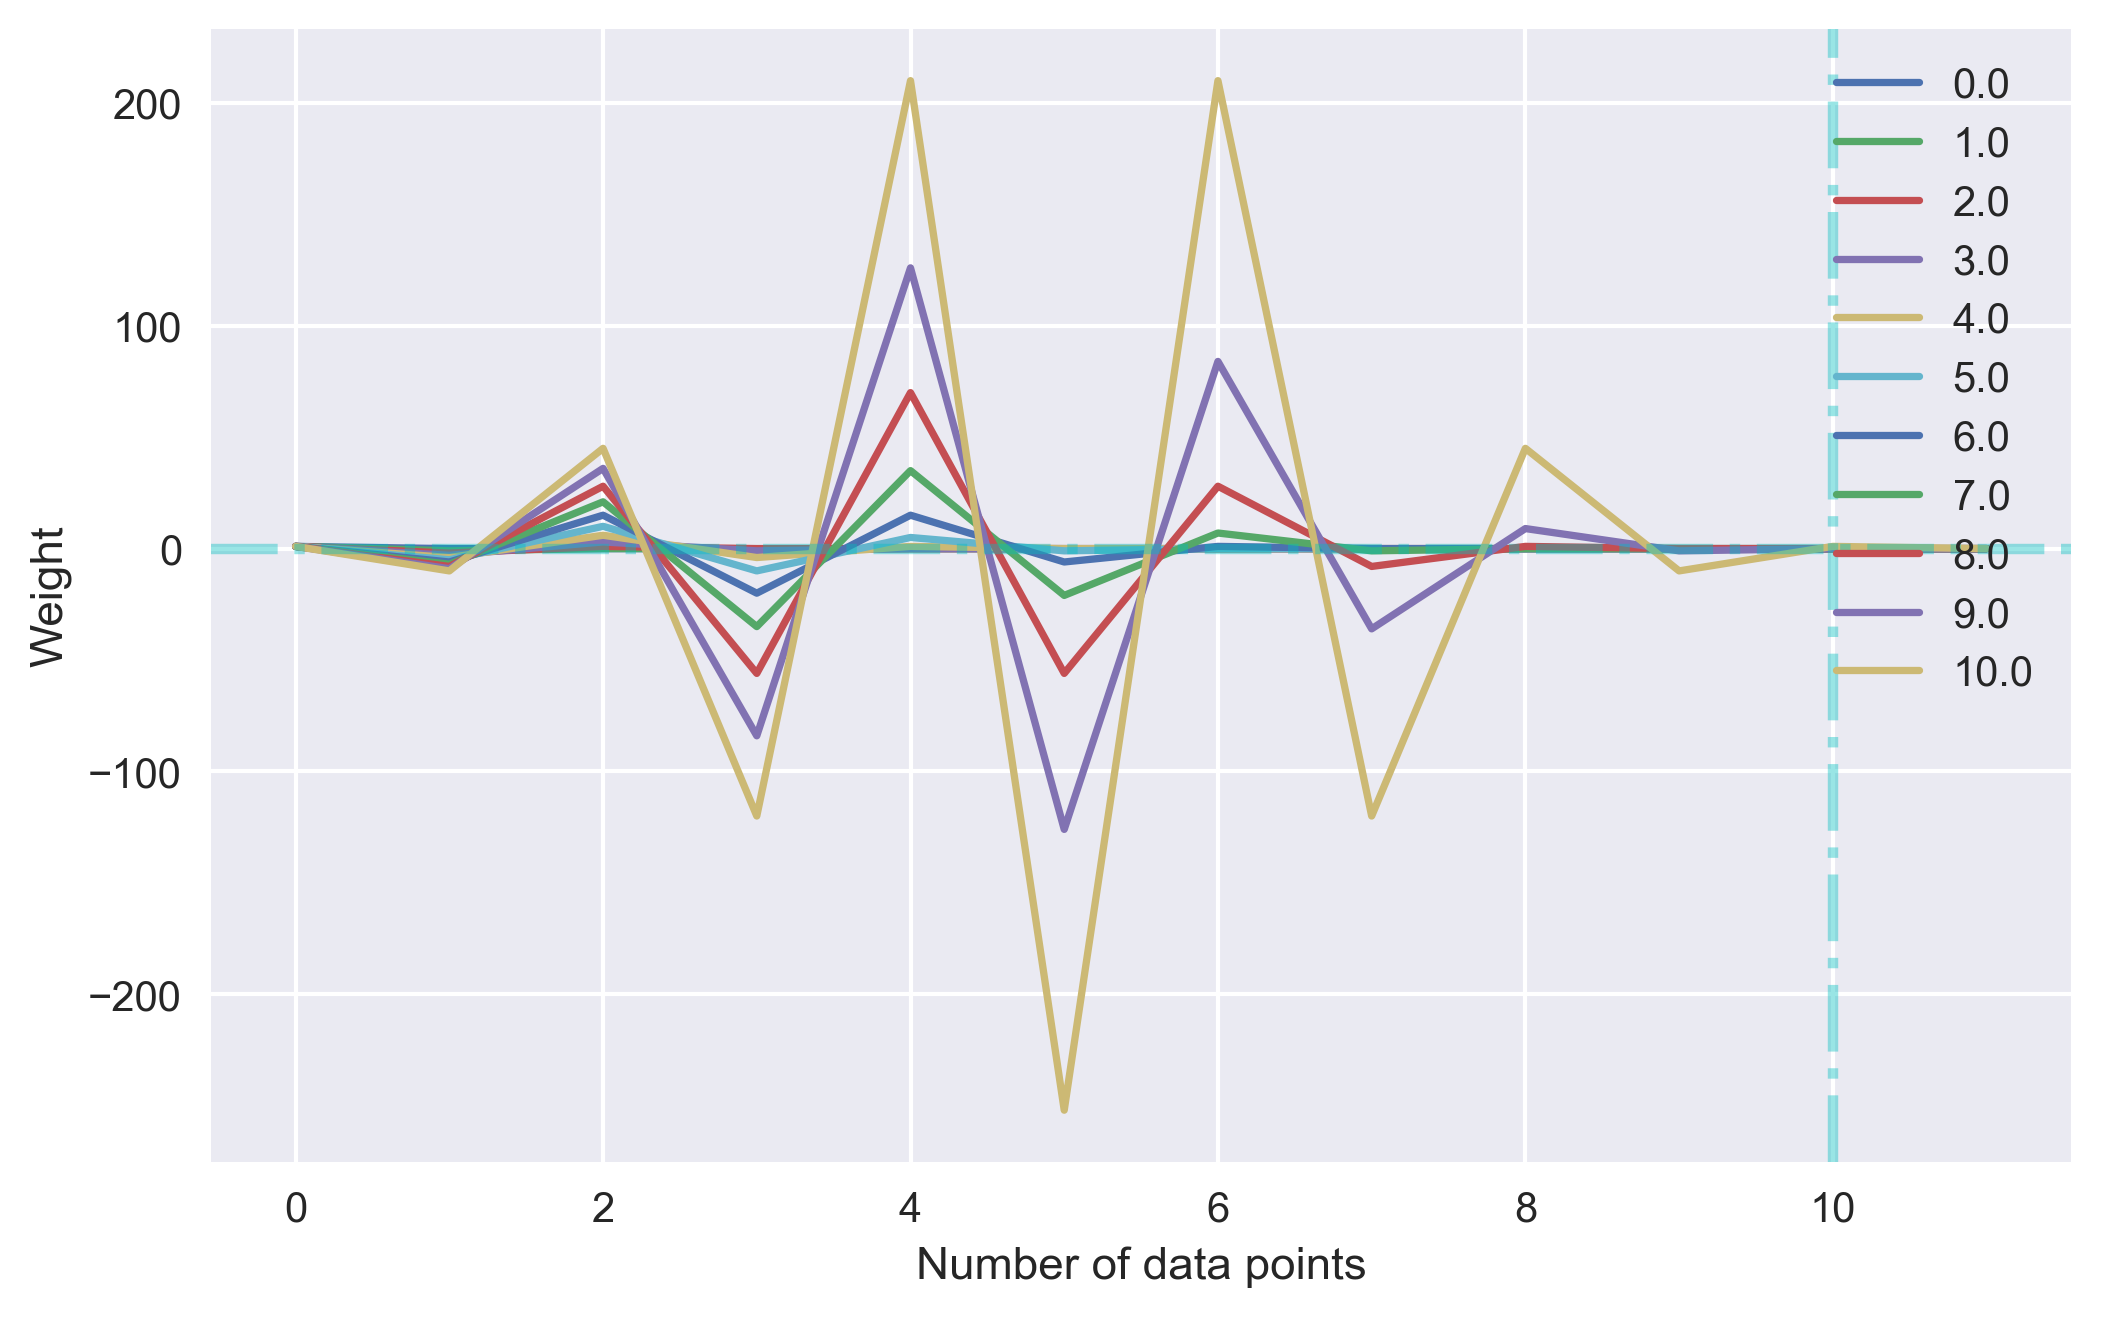

In [ ]:
plotWeights(weight_by_d_0_10, v = 10);

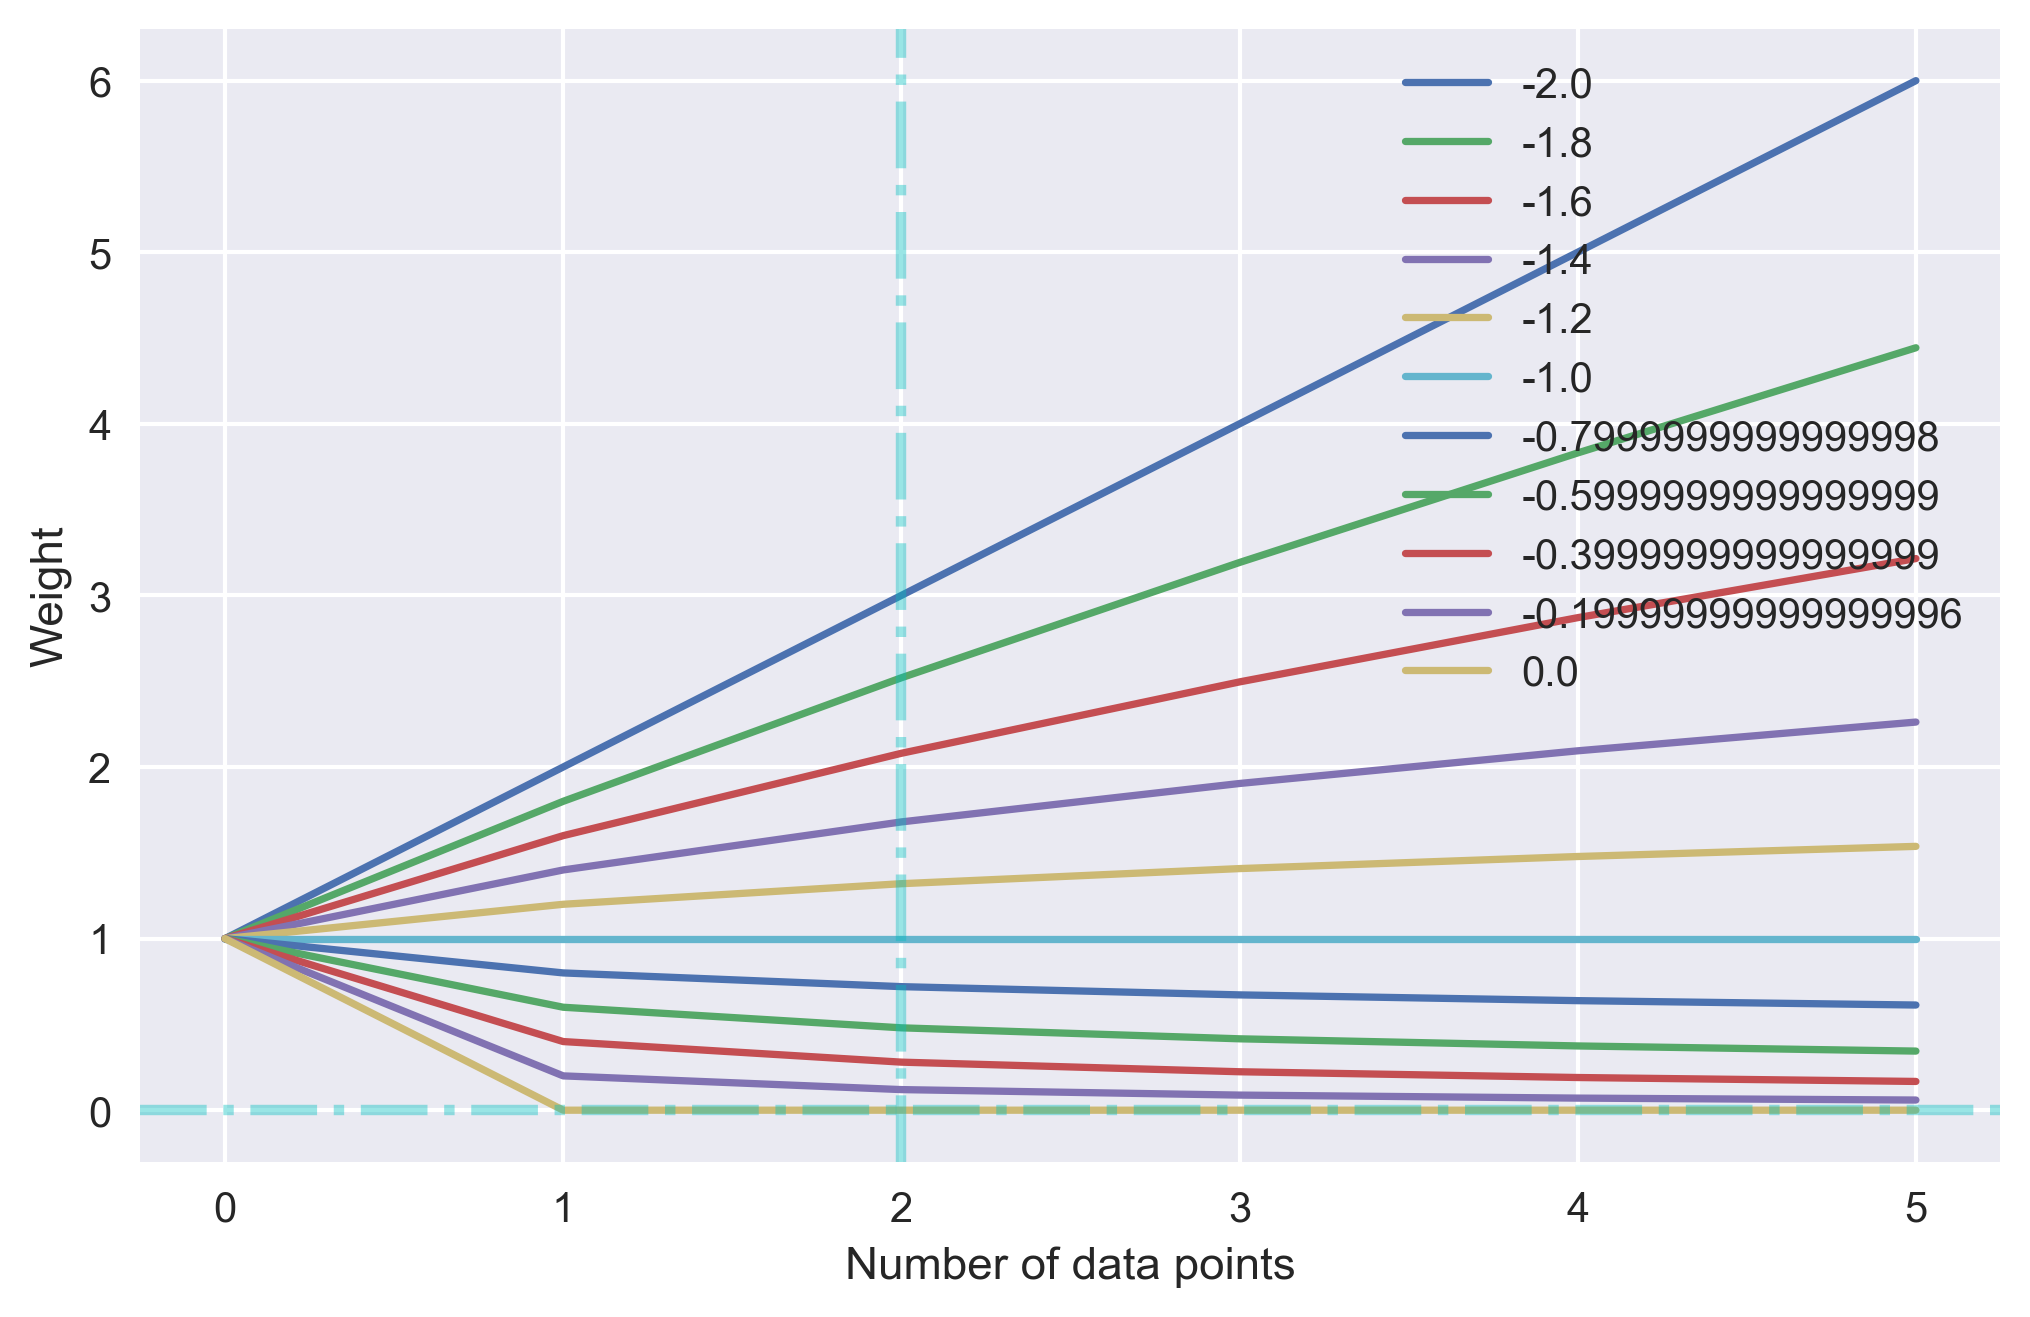

In [ ]:
plotWeights(weight_by_d_2_0);

From above result, we can see that for $ k > 0 $ , if 

$$
\omega_{k-1} \neq 0
$$

then 

$$
\lvert
\frac{\omega_{k}}
{\omega_{k-1}} \rvert = \lvert \frac{d-k+1}
{k} \rvert < 1 
$$
and $ \omega k = 0 $ otherwise.

 

The weights converge asynptotocally to zero, when d is fixed at one fractional number

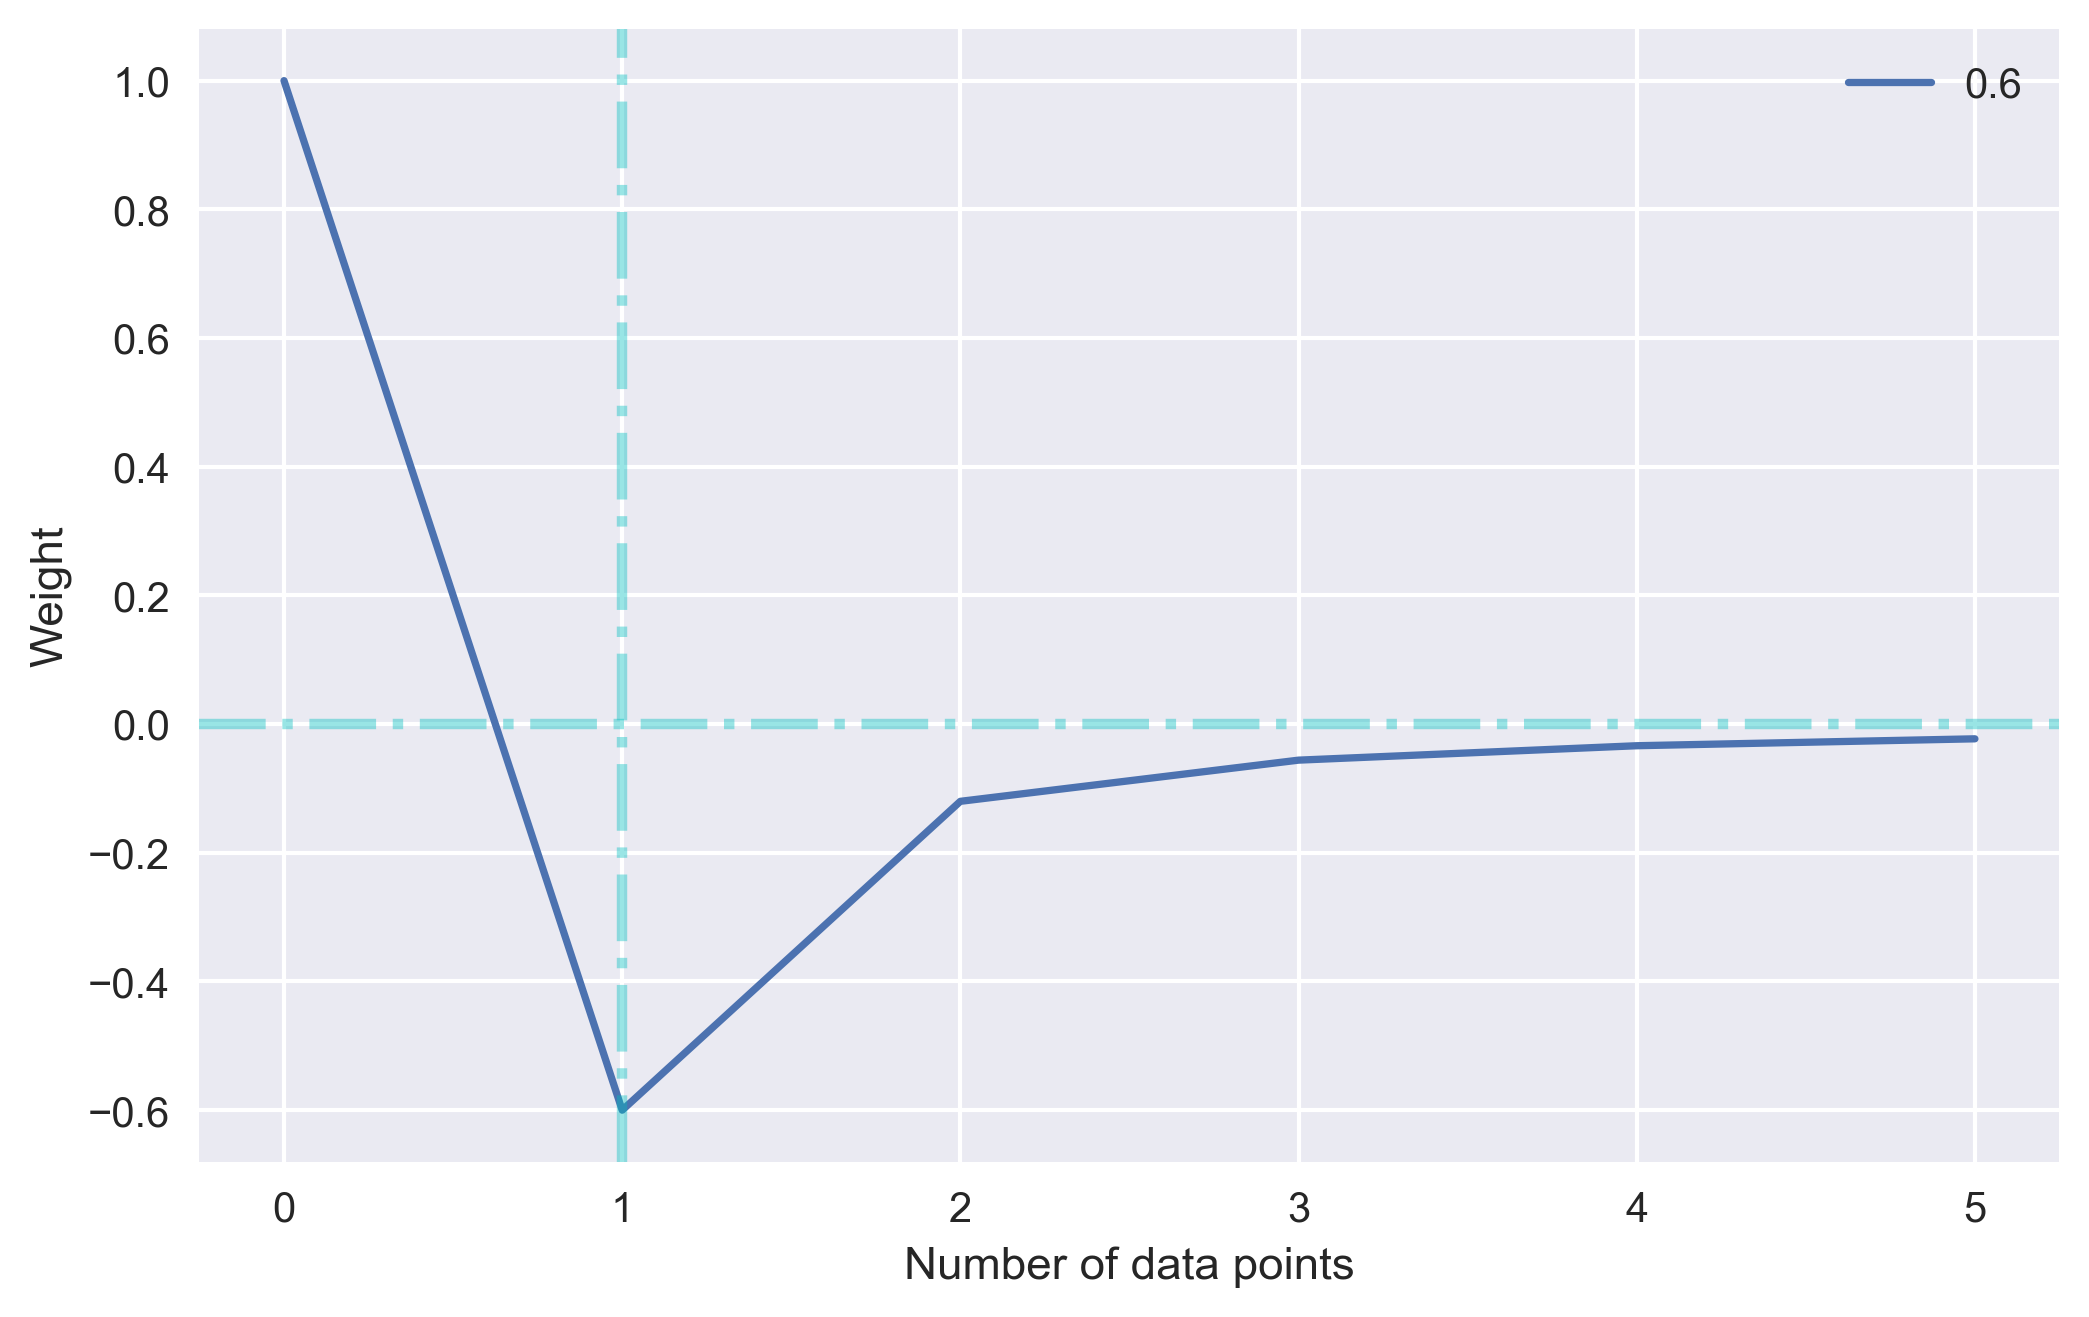

In [ ]:
weight_by_d_06_07 = weight_by_d([0.6, 0.7], nPlots=1)
plotWeights(weight_by_d_06_07, v=1);

It is from the cyan colour dash line where k > d (d=0.6). From that point, the weights converge asymptotically to zero, as an infinite product of factors within the unit circle. The absolute value of weight is getting smaller. That is why 

If  $\omega_{k-1} \neq 0$ then 
$$ \lvert\frac{\omega_{k}}
{\omega_{k-1}} \rvert = \lvert \frac{d-k+1}
{k} \rvert < 1 
$$
and $ \omega k = 0 $ otherwise. 

Also, for a positive $d$ and $ k<d+1, $ we have 
$$
\frac{d-k+1}{k} \geq 0
$$
which makes the initial weight alternate in sign. This can be illustrated from the plot of $d = 10$, 

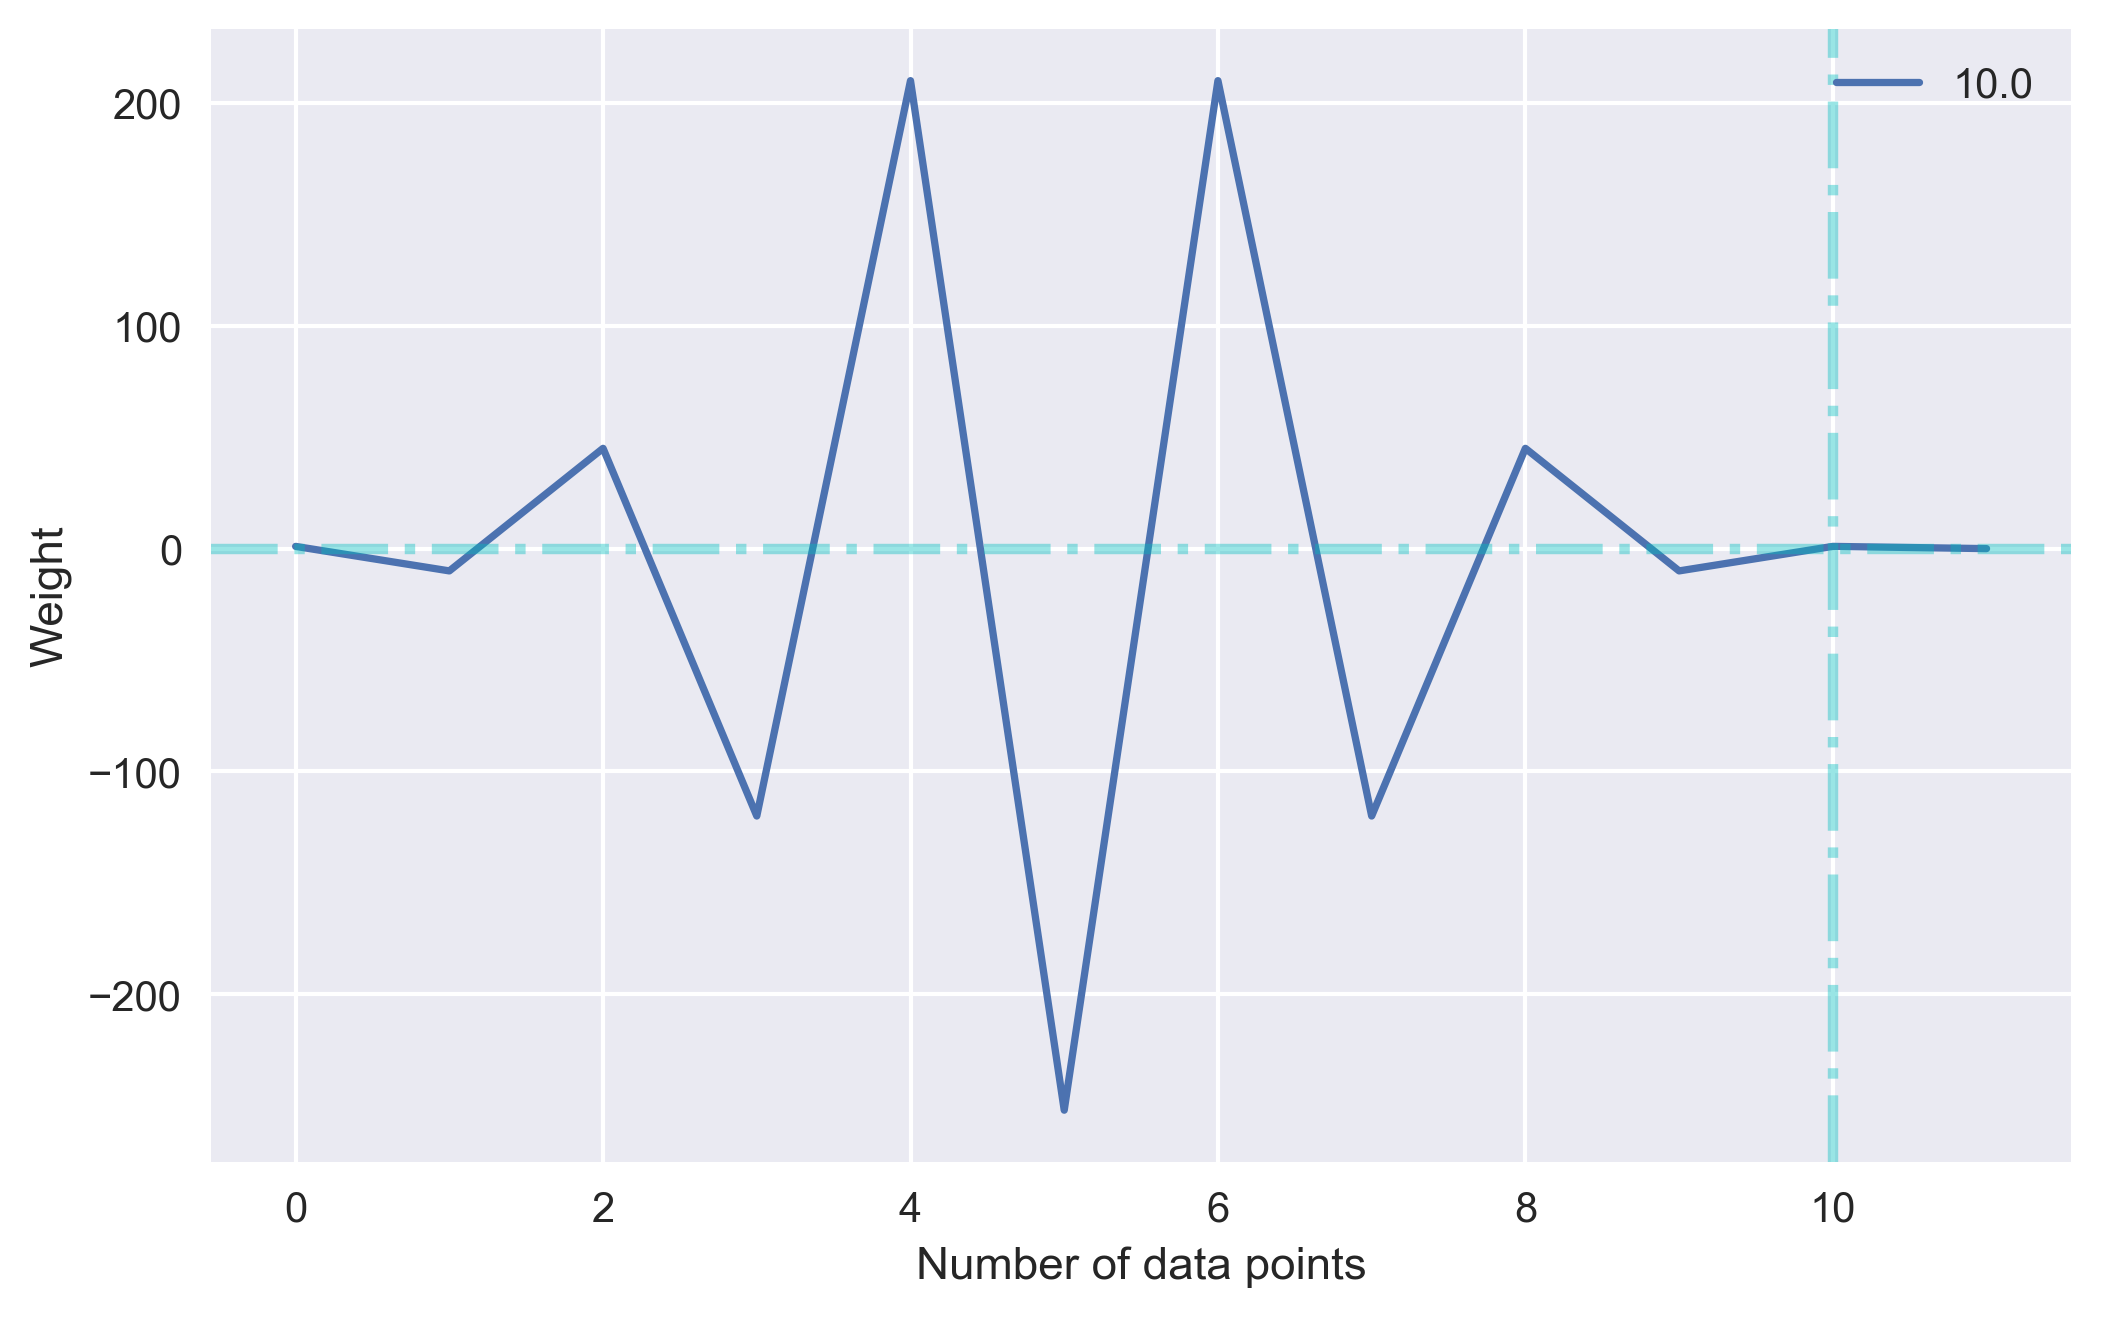

In [ ]:
weight_by_d_10_11 = weight_by_d([10, 11], nPlots=1, size=12)
plotWeights(weight_by_d_10_11, v=10);

For a non-integer $d$, once $ k \geq d+1, \omega$ will be negative if int[d] is even, and positive otherwise. This part is straightforward, For instance, when $d$ is in range $[0, 1]$, int($d = 0$), all weight are negative after $ k \geq 1(k\geq d+1)$. 

### **Summarizing** 

The converges to zero from the left when int $[d]$ is even
$$
\lim_{k \to \alpha} \omega_{k} = 0^{-}
$$
and converges to zero from the right when int $[d]$ is odd.
$$
\lim_{k \to \alpha} \omega_{k} = 0^{+}
$$

### **Fixed-Width Window Fracdiff**

The number of weight, and the number of past data point, will be a fixed window in Fixed-Width Window Fracdiff method. All we need to do is to set a threshold 𝜏 to fix the length of the weight. All the data point out of the window will be discarded (equal to set the weight to 0).

### **1. Get the weight**
If we set the threshold to 1e-4, assume that $d = 0.1$


In [ ]:
def getWeights_FFD(d=0.1, thres=1e-4):
    
    w,k=[1.],1
    while True:
        w_=-w[-1]/k*(d-k+1)
        if abs(w_)<thres:break
        w.append(w_)
        k+=1
    return np.array(w[::-1]).reshape(-1,1)

In [ ]:
w_FFD = getWeights_FFD(thres=1e-4)
w_FFD.shape

(503, 1)

### **2. Transfer the data**

In [ ]:
def transfer_data_by_frac_diff_FFD(col, d=0.1, thres=1e-4):
    #3) Apply weights to values
    w=getWeights_FFD(d,thres)
    width=len(w)-1
    
    df = pd.Series()
    #widow size can't be larger than the size of data
    if width >= col.shape[0]:raise Exception("width is oversize")
        
    for i in range(width, col.shape[0]):
        i_0_index, i_1_index = col.index[i-width], col.index[i]
        data = np.dot(w.T, col.loc[i_0_index:i_1_index])[0]
        
        df[i_1_index] = data
                   
    return df

In [ ]:
price_trans = transfer_data_by_frac_diff_FFD(price)
price_trans.shape, price.shape

<ipython-input-23-8961113669e2>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.Series()


((4781,), (5283,))

### **3. Transfer a series of features**

In [ ]:
def trans_a_bunch_of_data_FFD(df, d=0.1, thres=1e-4):
    a_bunch_of_trans_data = pd.DataFrame()
    
    for col in df.columns:
        trans_data = transfer_data_by_frac_diff_FFD(df[col], \
                     d=d, thres=thres)
        a_bunch_of_trans_data[col] = trans_data
    
    return df

In [ ]:
df = trans_a_bunch_of_data_FFD(df, d=0.1, thres=1e-4)
df

<ipython-input-23-8961113669e2>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.Series()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.858137,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.785788,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.797286,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.728291,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.762789,460734400
...,...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,130.347565,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,131.352829,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,136.050766,124486200


### **Compute the minimum coefficient $d$**
Consider a series {Xt}t=1,…,T . Applying the fixed-width window fracdiff (FFD) method on this series, we can compute the minimum coefficient d∗ such that the resulting fractionally differentiated series {Xt}t=l∗,…,T is stationary.


To compute the minimum coefficient d, we will use the Augmented Dickey-Fuller test¹, which is a type of statistical test called a unit root test. The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.


    - Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.


    - Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.


The test can be interpreted by the p-value. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise, a p-value above the threshold suggests we cannot reject the null hypothesis (non-stationary).


p-value > 0.05: cannot reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller
def get_adf_corr():
    out=pd.DataFrame(columns=['adfStat','pVal','lags',\
                             'nObs','95% conf','corr'])
    price_log = np.log(price)
    for d in np.linspace(0, 1 , 11):
        price_trans = transfer_data_by_frac_diff_FFD( \
                      price_log, d=d, thres=1e-4)
        corr = price_corr_np = np.corrcoef(price.loc[price_trans.index], price_trans)[0,1]
        adf=adfuller(price_trans, maxlag=1, regression='c',autolag=None)
        out.loc[d]=list(adf[:4])+[adf[4]['5%']]+[corr] 
        # with critical value

    return out

In [ ]:
out = get_adf_corr()
out

<ipython-input-23-8961113669e2>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.Series()
<ipython-input-23-8961113669e2>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.Series()
<ipython-input-23-8961113669e2>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.Series()
<ipython-input-23-8961113669e2>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.Series()
<ipython-input-23-8961113669e2>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'f

,adfStat,pVal,lags,nObs,95% conf,corr
0.0,0.350523,9.795473e-01,1.0,5281.0,-2.862087,0.775999
0.1,-0.894208,7.898738e-01,1.0,4779.0,-2.862145,0.772903
0.2,-1.568532,4.993791e-01,1.0,4785.0,-2.862144,0.771638
0.3,-2.950096,3.982502e-02,1.0,4894.0,-2.862131,0.763278
0.4,-5.097229,1.419999e-05,1.0,5000.0,-2.862118,0.750513
0.5,-8.729359,3.222963e-14,1.0,5082.0,-2.862109,0.713507
0.6,-14.385150,9.015664e-27,1.0,5142.0,-2.862102,0.637672
0.7,-22.123581,0.000000e+00,1.0,5185.0,-2.862098,0.529200
0.8,-31.586255,0.000000e+00,1.0,5218.0,-2.862094,0.386444
0.9,-42.318722,0.000000e+00,1.0,5244.0,-2.862091,0.228554


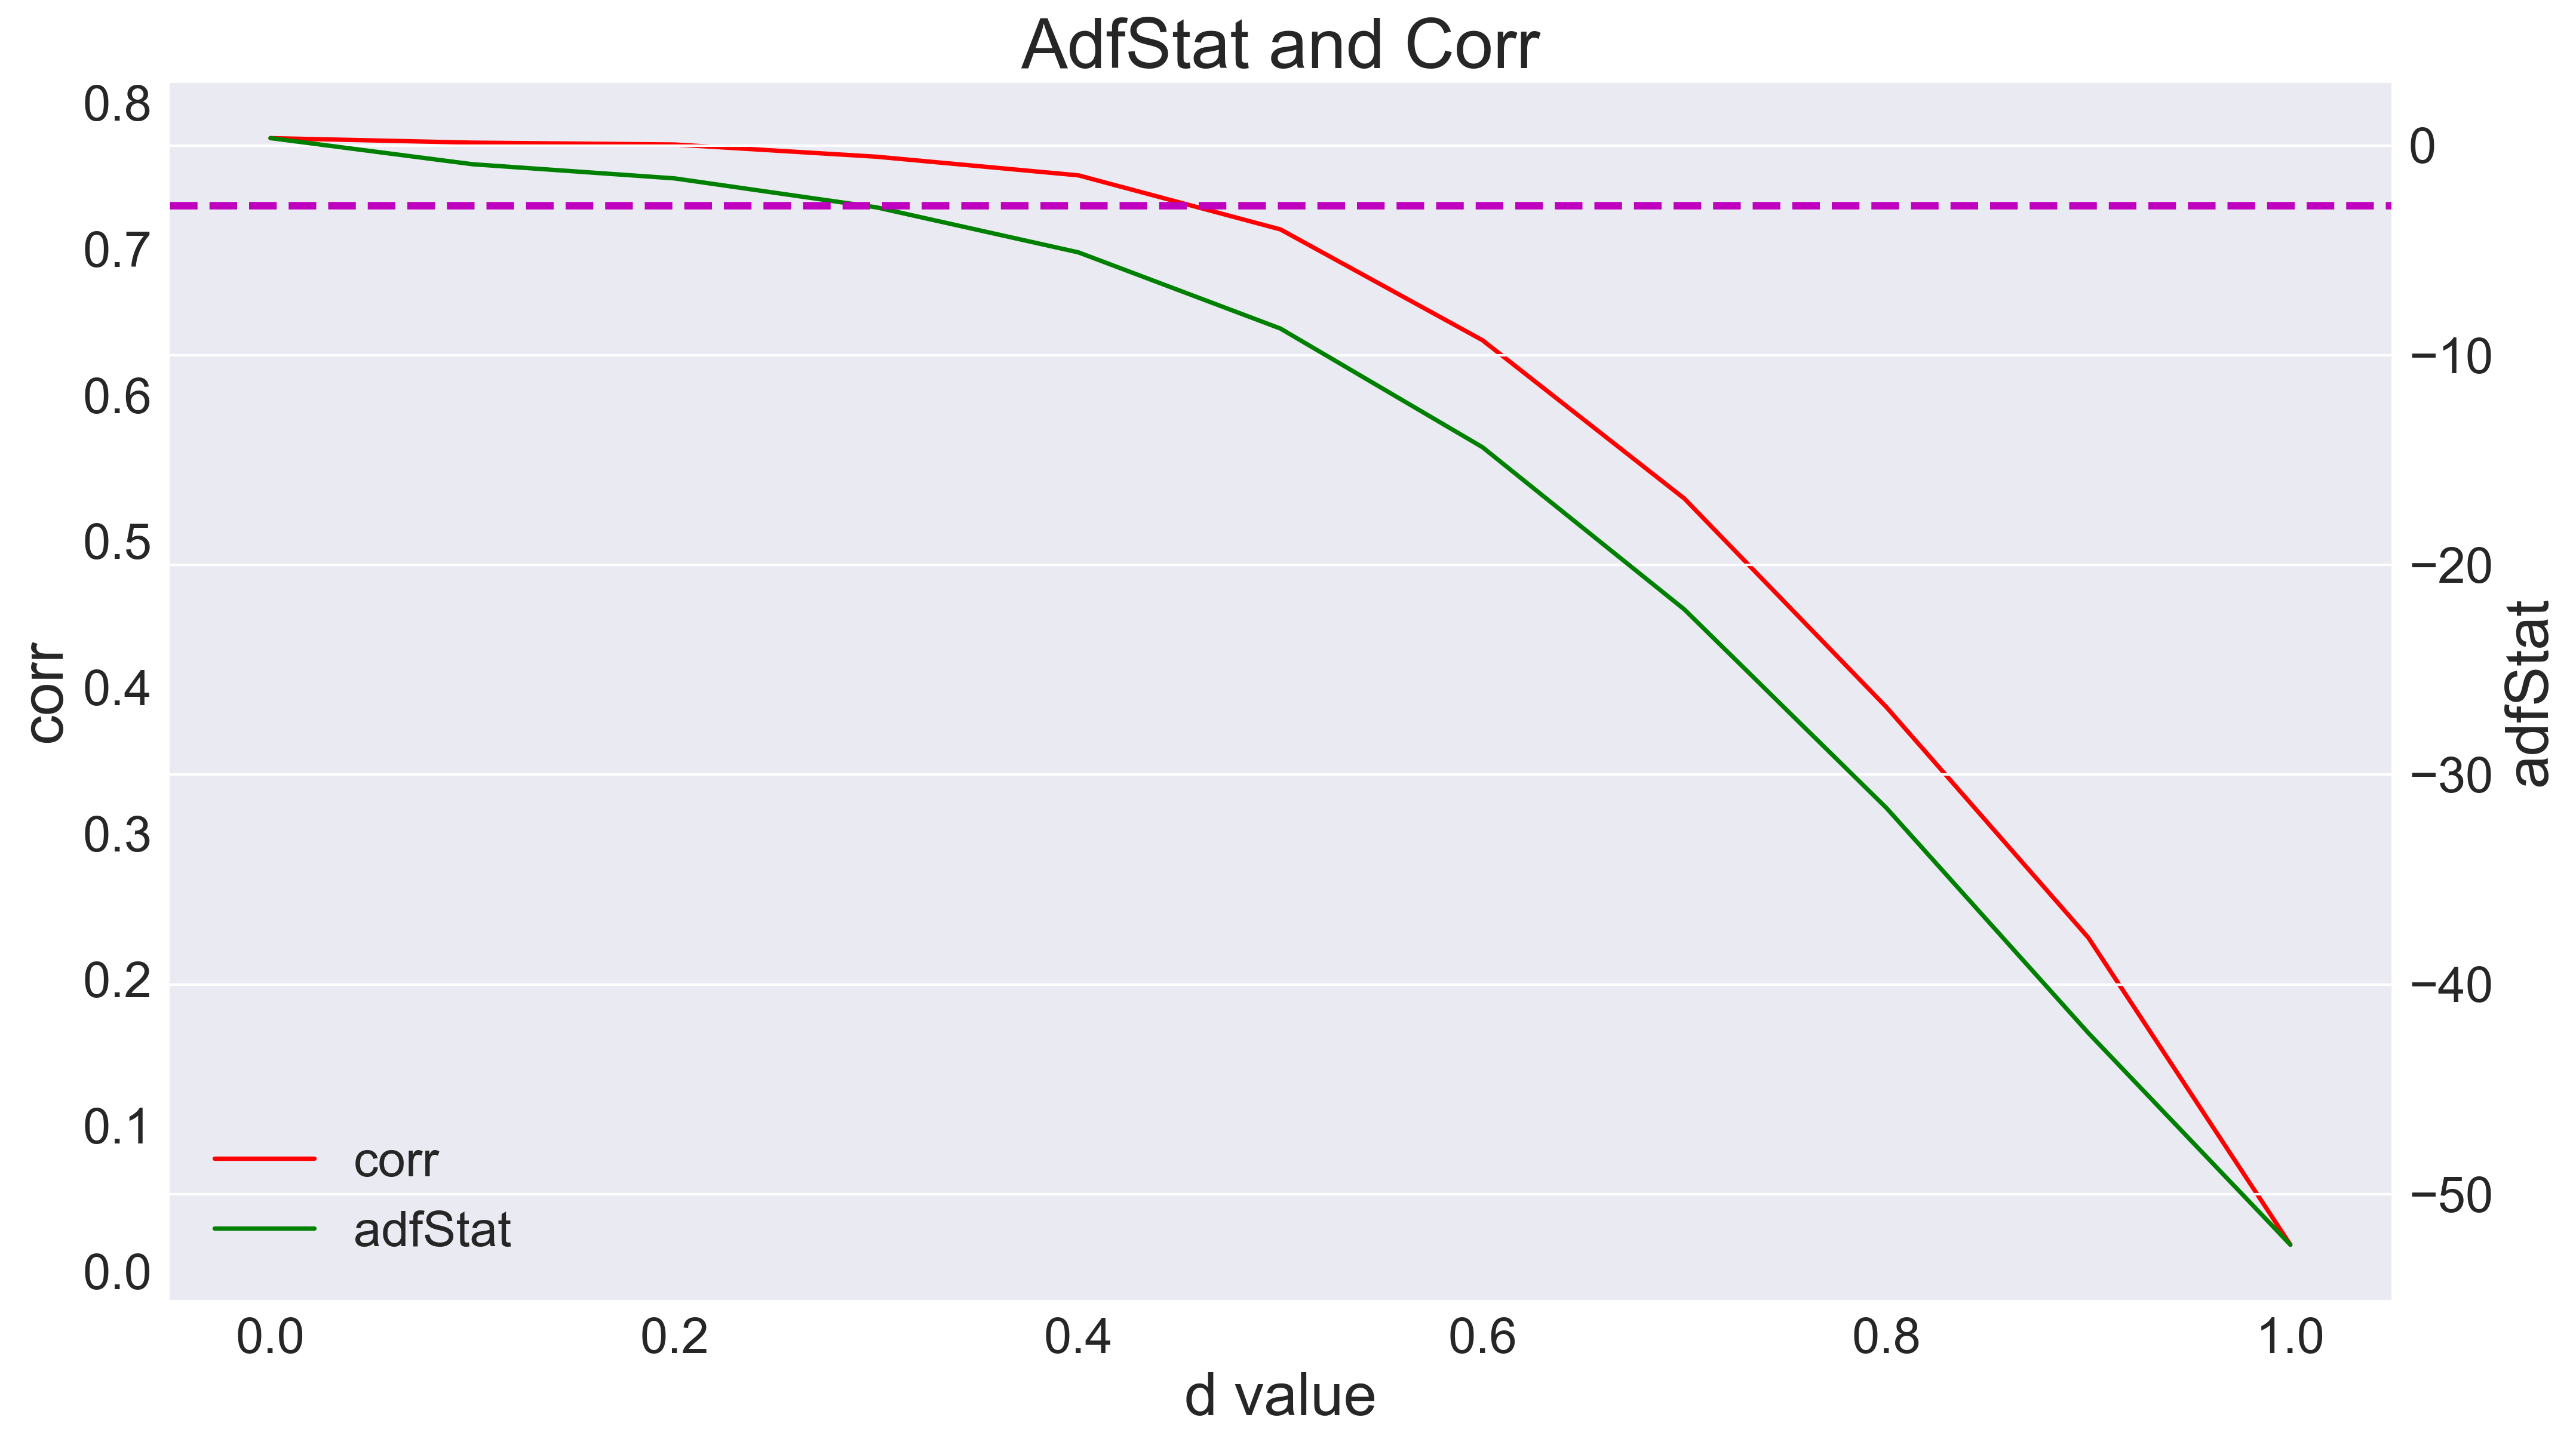

In [ ]:
ax1 = out['corr'].plot(figsize=(16, 9), color='r')
ax2 = out['adfStat'].plot(secondary_y=True, fontsize=20, color='g', ax=ax1)
ax1.set_title('AdfStat and Corr', fontsize=28)
ax1.set_xlabel('d value', fontsize=24)
ax1.set_ylabel('corr', fontsize=24)
ax2.set_ylabel('adfStat', fontsize=24)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='lower left', fontsize=20)
plt.axhline(out['95% conf'].mean(),linewidth=3, color='m',linestyle='--');

In [ ]:
df = trans_a_bunch_of_data_FFD(df, d=0.3, thres=1e-4)
df

<ipython-input-23-8961113669e2>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.Series()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.858137,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.785788,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.797286,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.728291,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.762789,460734400
...,...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,130.347565,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,131.352829,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,136.050766,124486200


2020-12-23	132.160004	132.429993	130.779999	130.960007	130.347565	88223700